# **Bloque 1: Conexión google colab**

Este bloque de código sirve para conectar tu entorno de Google Colab con tu unidad de Google Drive, donde tienes guardados los archivos PDF que quieres analizar. Es necesario para poder acceder a los datos desde el código.

In [1]:
from google.colab import drive

drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
pip install PyPDF2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import os
from PyPDF2 import PdfReader

#Para manejo de dataframes
import pandas as pd  
import numpy as np   
#Para gráficas
import matplotlib.pyplot as plt 

import seaborn as sns  

#Expresiones regulares
import re    
import scipy  

#Para stemming
import nltk
from nltk.stem import PorterStemmer         
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords



#Para crear el BoW
from gensim.corpora import Dictionary    
#Para la creación del BoW
from gensim.test.utils import common_texts
#Para la creación del BoW
from gensim.corpora.dictionary import Dictionary
#Para la creación del modelo LDA
from gensim.models.ldamulticore import LdaModel
#Para el modelo LDA
from gensim.models.ldamulticore import LdaMulticore
#Para el modelo LDA
from gensim.models import CoherenceModel

#Procesamiento multiple
import multiprocessing as mp            
import time                             
       
      
#importacion de librerias 

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler 
from sklearn.decomposition import PCA 
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.decomposition import TruncatedSVD




# **Bloque 9: Reducción de dimensionalidad N componentes SVD y su varianza explicada**

En esta parte del proceso, se realizo los siguientes pasos 

1) se tokenizo, limpio, se lematizo los datos

2) se vectorizo en TF-IDF

3) Se hizo reduccion de dimensionalidad

4) Se agrupa con diferentes tipos de distancia hasta encontrar el mas conveniente

5) Se categoriza con los topicos que fueron producto de NMF(norma frobenius)





b) SVD (Descomposición en Valores Singulares): SVD también se utiliza para la reducción de dimensionalidad y es similar a PCA en algunos aspectos. SVD descompone una matriz en tres componentes: una matriz de vectores singulares izquierdos, una matriz diagonal de valores singulares y una matriz de vectores singulares derechos. Al igual que con PCA, se pueden seleccionar un número reducido de valores singulares para reducir la dimensionalidad de los datos mientras se mantiene la información esencial.

En términos matriciales, SVD implica descomponer la matriz de características en sus componentes singulares y seleccionar un número reducido de componentes singulares más significativos para reducir la dimensionalidad.


https://interactivechaos.com/es/wiki/descomposicion-en-valores-singulares-svd

https://hackernoon.com/es/tutorial-de-modelado-de-tema-avanzado-como-usar-svd-y-nmf-en-python-para-encontrar-temas-en-texto

# **Visualizar los datos clase 1 y calse 0 con svd**

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Matriz TF-IDF creada con dimensiones (496, 85646)
Clase 1 Count: 23
Clase 0 Count: 1


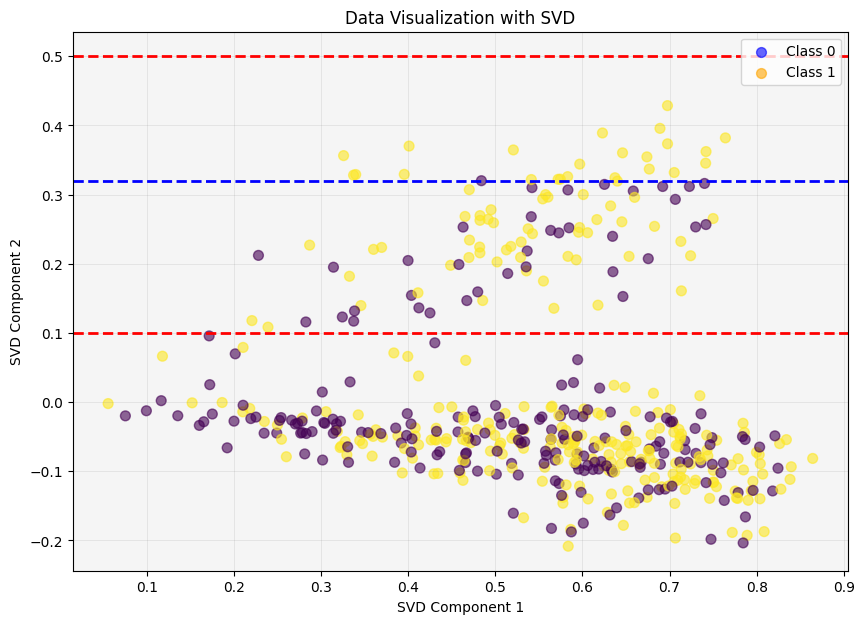

Varianza explicada por cada componente:
Component 1: 3.97%
Component 2: 2.95%


In [4]:
data_nuevo = pd.read_csv('/content/drive/MyDrive/Proyecto integrador/data_modif.csv', sep=",")
pdf_texts_nuevo = data_nuevo['text']

nltk.download('punkt')
nltk.download('stopwords')

def clean_text_nuevo(text):
    # Convertir el texto a minúsculas
    text = text.lower()
    # Tokenizar el texto usando el idioma inglés
    tokens = nltk.word_tokenize(text, language="english")
    # Eliminar las palabras vacías, los espacios y las URL
    stop_words = set(stopwords.words("english"))
    tokens = [token.strip() for token in tokens if token.isalpha() and token not in stop_words and not re.match(r"https?://\S+", token)]
    # Eliminar los guiones y las palabras muy cortas o muy largas
    tokens = [token.replace("-", "") for token in tokens if 2 < len(token) < 18]
    
    # Eliminar los nombres de los meses uno por uno
    tokens = [token for token in tokens if token.lower() != "january"]
    tokens = [token for token in tokens if token.lower() != "february"]
    tokens = [token for token in tokens if token.lower() != "march"]
    tokens = [token for token in tokens if token.lower() != "april"]
    tokens = [token for token in tokens if token.lower() != "may"]
    tokens = [token for token in tokens if token.lower() != "june"]
    tokens = [token for token in tokens if token.lower() != "july"]
    tokens = [token for token in tokens if token.lower() != "august"]
    tokens = [token for token in tokens if token.lower() != "september"]
    tokens = [token for token in tokens if token.lower() != "october"]
    tokens = [token for token in tokens if token.lower() != "november"]
    tokens = [token for token in tokens if token.lower() != "december"]
    
    # Eliminar los nombres de los días de la semana uno por uno  
    tokens = [token for token in tokens if token.lower() != "monday"]
    tokens = [token for token in tokens if token.lower() != "tuesday"]
    tokens = [token for token in tokens if token.lower() != "wednesday"]
    tokens = [token for token in tokens if token.lower() != "thursday"]
    tokens = [token for token in tokens if token.lower() != "friday"]
    tokens = [token for token in tokens if token.lower() != "saturday"]
    tokens = [token for token in tokens if token.lower() != "sunday"]

    # Eliminar palabras varias
    tokens = [token for token in tokens if token.lower() != "https"]
    tokens = [token for token in tokens if token.lower() != "http"]
    tokens = [token for token in tokens if token.lower() != "years"]
    tokens = [token for token in tokens if token.lower() != "year"]
    tokens = [token for token in tokens if token.lower() != "also"]
    tokens = [token for token in tokens if token.lower() != "could"]

    return tokens

# Usar la función para limpiar cada texto en la lista 'pdf_texts_nuevo'
cleaned_texts_nuevo = [clean_text_nuevo(text) for text in pdf_texts_nuevo]

# Convertir la lista de listas en una lista de strings
stemmed_texts_joined_nuevo = [' '.join(text) for text in cleaned_texts_nuevo]

# Crear una instancia de TfidfVectorizer
tfidf_vectorizer_nuevo = TfidfVectorizer()

# Transformar los datos procesados en una matriz TF-IDF
X_tfidf_nuevo = tfidf_vectorizer_nuevo.fit_transform(stemmed_texts_joined_nuevo)

print(f"Matriz TF-IDF creada con dimensiones {X_tfidf_nuevo.shape}")

import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import TruncatedSVD

# Crear una instancia de SVD
svd_nuevo = TruncatedSVD(n_components=2)
X_svd_nuevo = svd_nuevo.fit_transform(X_tfidf_nuevo)
explained_variance_ratio_nuevo = svd_nuevo.explained_variance_ratio_

# Obtener las coordenadas x e y para cada punto
x_svd_nuevo = X_svd_nuevo[:, 0]
y_svd_nuevo = X_svd_nuevo[:, 1]
y_nuevo = data_nuevo['performance']




# Crear un gráfico de dispersión con diferentes colores para cada clase
plt.figure(figsize=(10, 7))
plt.scatter(x_svd_nuevo, y_svd_nuevo, c=y_nuevo, cmap='viridis', marker='o', s=50, alpha=0.6)
plt.xlabel('SVD Component 1')
plt.ylabel('SVD Component 2')
plt.title('Data Visualization with SVD')
plt.grid(color='gray', linestyle='-', linewidth=0.5, alpha=0.2)

# Dibujar una línea horizontal desde 0.1 hasta 0.5 en el componente 2
plt.axhline(y=0.1, color='red', linestyle='--', linewidth=2)
plt.axhline(y=0.5, color='red', linestyle='--', linewidth=2)
plt.axhline(y=0.32, color='blue', linestyle='--', linewidth=2)

# Calcular el número de datos de clase 0 y clase 1 en el rango especificado
class_1_count_nuevo = np.sum((y_nuevo == 1) & (y_svd_nuevo > 0.32))
class_0_count_nuevo = np.sum((y_nuevo == 0) & (y_svd_nuevo > 0.32))
print(f"Clase 1 Count: {class_1_count_nuevo}")
print(f"Clase 0 Count: {class_0_count_nuevo}")

# Crear leyenda para identificar las clases
legend_labels_nuevo = ['Class 0', 'Class 1']
handles_nuevo = [plt.scatter([], [], c='blue', marker='o', s=50, alpha=0.6),
           plt.scatter([], [], c='orange', marker='o', s=50, alpha=0.6)]
plt.legend(handles_nuevo, legend_labels_nuevo, loc='upper right')

plt.gca().set_facecolor('whitesmoke')
plt.show()


# Mostrar la varianza explicada por cada componente
print("Varianza explicada por cada componente:")
for i, ratio in enumerate(explained_variance_ratio_nuevo):
    print(f"Component {i+1}: {ratio*100:.2f}%")



El número de componentes que explica al menos el 90% de la varianza es: 361


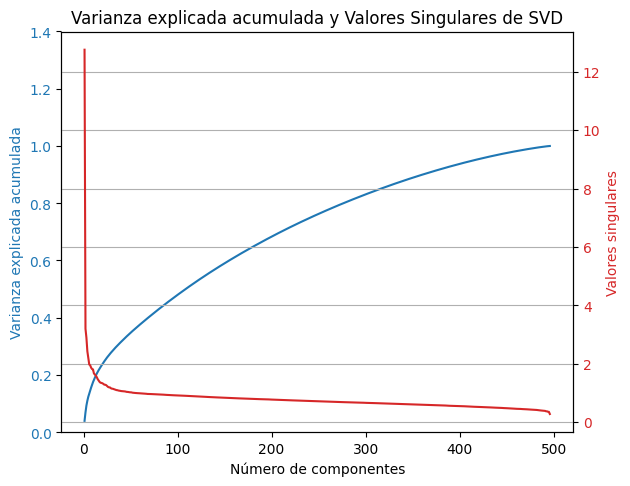

Matriz reducida por svd creada con dimensiones (496, 361)


In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import TruncatedSVD



# Supongamos que X_scaled es una matriz de 496 filas (pdfs) y n columnas (características)
svd = TruncatedSVD(n_components=496) # Crear el objeto svd con el máximo número de componentes posible
X_transformed = svd.fit_transform(X_tfidf_nuevo) # Ajustar y transformar los datos
var_exp = svd.explained_variance_ratio_ # Obtener la varianza explicada por cada componente
cum_var_exp = np.cumsum(var_exp) # Obtener la varianza acumulada por cada componente
singular_values = svd.singular_values_ # Obtener los valores singulares

# Buscar el número de componentes que explique al menos el 90% de la varianza total
n_comp = np.where(cum_var_exp >= 0.9)[0][0] + 1 # Sumar 1 porque los índices empiezan en 0
print("El número de componentes que explica al menos el 90% de la varianza es:", n_comp)

# Gráfico de la varianza explicada acumulada y valores singulares con líneas
fig, ax1 = plt.subplots()

color = 'tab:blue'
ax1.set_xlabel('Número de componentes')
ax1.set_ylabel('Varianza explicada acumulada', color=color)
ax1.plot(np.arange(1, len(cum_var_exp) + 1), cum_var_exp, linestyle='-', color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_ylim(0.0, 1.4)

ax2 = ax1.twinx()  # Crear un segundo eje y

color = 'tab:red'
ax2.set_ylabel('Valores singulares', color=color)
ax2.plot(np.arange(1, len(singular_values) + 1), singular_values, linestyle='-', color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # Ajustar el espacio entre subplots
plt.title('Varianza explicada acumulada y Valores Singulares de SVD')
plt.grid(True)
plt.show()

# Aplicar svd con el número óptimo de componentes a la matriz estandarizada
svd = TruncatedSVD(n_components=n_comp)
X_svd = svd.fit_transform(X_tfidf_nuevo)

print(f"Matriz reducida por svd creada con dimensiones {X_svd.shape}")


# Kmedias y kmedois  distancia eculidiana

In [6]:
!pip install textdistance
!pip install scikit-learn-extra
!pip install kmodes


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [7]:
binario=data_nuevo['performance']

# **con s_svd**

In [8]:
kcluster=4

## **1) eculidiana**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


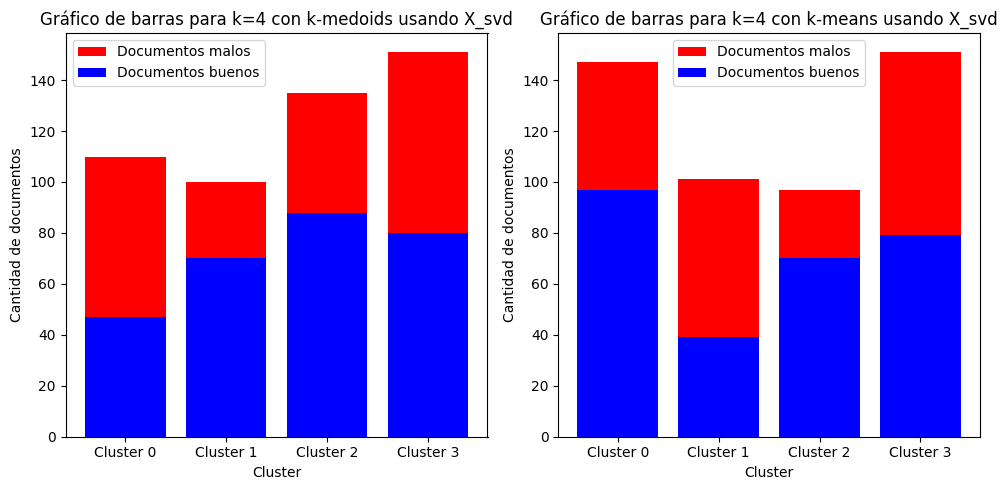

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn_extra.cluster import KMedoids
from sklearn.cluster import KMeans
from scipy.spatial.distance import cityblock
from numpy.linalg import norm
from scipy.spatial.distance import hamming
from scipy.spatial.distance import mahalanobis

X_svd=X_svd_nuevo
def grafico_barras(datos, etiquetas, titulo, colores):
    clusters = np.array([f"Cluster {i}" for i in range(kcluster)]) # Usar kcluster como el número de grupos

    counts = np.zeros(kcluster)
    prop_buenos = np.zeros(kcluster)

    for i in range(kcluster):
        mask = etiquetas == i
        docs_grupo = datos[mask]
        calidad_grupo = calidad[mask]

        counts[i] = len(docs_grupo)

        buenos_grupo = np.sum(calidad_grupo == 1)
        prop_buenos[i] = buenos_grupo / counts[i]

    order = np.arange(kcluster)
    clusters = clusters[order]
    counts = counts[order]
    prop_buenos = prop_buenos[order]

    plt.bar(clusters, counts, color=colores)
    plt.bar(clusters, counts * prop_buenos, color="blue")
    plt.bar(clusters, counts * (1 - prop_buenos), color="red", bottom=counts * prop_buenos)
    plt.legend(["Documentos malos", "Documentos buenos"])
    plt.xlabel("Cluster")
    plt.ylabel("Cantidad de documentos")
    plt.title(titulo)

calidad = binario

kmedoids = KMedoids(n_clusters=kcluster, metric='euclidean', random_state=0)
kmedoids.fit(X_svd)
labels_kmedoids = kmedoids.labels_

kmeans = KMeans(n_clusters=kcluster, random_state=0)
kmeans.fit(X_svd)
labels_kmeans = kmeans.labels_

colors = ["red", "blue", "green"]

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
plt.subplots_adjust(wspace=0.3)

plt.sca(axs[0])
grafico_barras(X_svd, labels_kmedoids, f"Gráfico de barras para k={kcluster} con k-medoids usando X_svd", colors)

plt.sca(axs[1])
grafico_barras(X_svd, labels_kmeans, f"Gráfico de barras para k={kcluster} con k-means usando X_svd", colors)

plt.tight_layout()
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


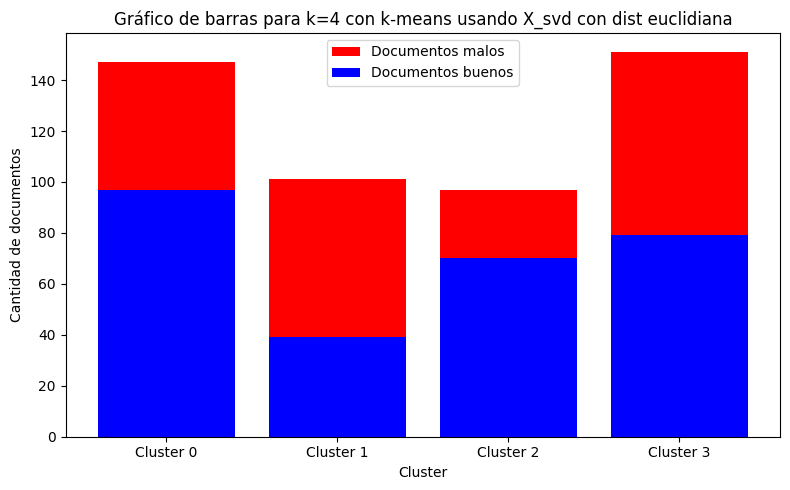

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn_extra.cluster import KMedoids
from sklearn.cluster import KMeans
from scipy.spatial.distance import cityblock
from numpy.linalg import norm
from scipy.spatial.distance import hamming
from scipy.spatial.distance import mahalanobis

X_svd = X_svd_nuevo

def grafico_barras(datos, etiquetas, titulo, colores):
    clusters = np.array([f"Cluster {i}" for i in range(kcluster)])  # Usar kcluster como el número de grupos

    counts = np.zeros(kcluster)
    prop_buenos = np.zeros(kcluster)

    for i in range(kcluster):
        mask = etiquetas == i
        docs_grupo = datos[mask]
        calidad_grupo = calidad[mask]

        counts[i] = len(docs_grupo)

        buenos_grupo = np.sum(calidad_grupo == 1)
        prop_buenos[i] = buenos_grupo / counts[i]

    order = np.arange(kcluster)
    clusters = clusters[order]
    counts = counts[order]
    prop_buenos = prop_buenos[order]

    plt.bar(clusters, counts, color=colores)
    plt.bar(clusters, counts * prop_buenos, color="blue")
    plt.bar(clusters, counts * (1 - prop_buenos), color="red", bottom=counts * prop_buenos)
    plt.legend(["Documentos malos", "Documentos buenos"])
    plt.xlabel("Cluster")
    plt.ylabel("Cantidad de documentos")
    plt.title(titulo)

calidad = binario

kmedoids = KMedoids(n_clusters=kcluster, metric='euclidean', random_state=0)
kmedoids.fit(X_svd)
labels_kmedoids = kmedoids.labels_

kmeans = KMeans(n_clusters=kcluster, random_state=0)
kmeans.fit(X_svd)
labels_kmeans = kmeans.labels_

colors = ["red", "blue", "green"]

fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(8, 5))  # Solo una gráfica

plt.sca(axs)
grafico_barras(X_svd, labels_kmeans, f"Gráfico de barras para k={kcluster} con k-means usando X_svd con dist euclidiana", colors)  # Usar labels_kmeans en lugar de labels_kmedoids

plt.tight_layout()
plt.show()



## cluster 0, 1, 2, 3

In [11]:
# Supongamos que data es el DataFrame de pandas con los datos completos
# Supongamos que labels es el array de 267 elementos con las etiquetas de los clusters

# Añadir una columna al DataFrame con las etiquetas de los clusters
data_nuevo["cluster"] = labels_kmeans

# Filtrar el DataFrame solo para el grupo 1
data_nuevo_grupo0 = data_nuevo[data_nuevo["cluster"] == 0]

# Mostrar el DataFrame filtrado
data_nuevo_grupo0


,id,ticker,name,eva,eva_spd,mkt_cap,performance,text,cluster
6,7,META,META PLATFORMS INC-CLASS A,11150.448830,7.060061,5.508350e+11,1,24/5/23 00:15 meta-20221231 https://www .sec.g...,0
14,15,PG,PROCTER & GAMBLE CO/THE,8515.124645,10.696452,3.566790e+11,1,2022 Annual Report FINANCIAL HIGHLIGHTS (UNAU...,0
28,29,TMO,THERMO FISHER SCIENTIFIC INC,890.421775,1.103797,2.177730e+11,1,Annual Report 2022 Our Mission is to enable ou...,0
117,118,APD,AIR PRODUCTS & CHEMICALS INC,226.375773,0.967083,6.487928e+10,1,23/5/23 18:30 apd-20220930 https://www .sec.go...,0
119,120,CL,COLGATE-PALMOLIVE CO,1497.667702,13.394756,6.328407e+10,1,23/5/23 18:35 cl-20221231 https://www .sec.gov...,0
...,...,...,...,...,...,...,...,...,...
480,481,AAP,ADVANCE AUTO PARTS INC,-65.099168,-0.868939,7.658623e+09,0,30/5/23 20:20 aap-20221231 https://www .sec.go...,0
483,484,SEE,SEALED AIR CORP,298.871799,7.328882,6.861184e+09,1,30/5/23 20:18 see-20221231 https://www .sec.go...,0
484,485,GNRC,GENERAC HOLDINGS INC,-32.959152,-0.814808,6.326755e+09,0,30/5/23 20:17 gnrc20221231_10k.htm https://www...,0
486,487,AIZ,ASSURANT INC,49.648576,0.168604,6.213438e+09,1,30/5/23 16:04 aiz-20221231 https://www .sec.go...,0


In [12]:
# Supongamos que data es el DataFrame de pandas con los datos completos
# Supongamos que labels es el array de 267 elementos con las etiquetas de los clusters

# Añadir una columna al DataFrame con las etiquetas de los clusters
data_nuevo["cluster"] = labels_kmeans

# Filtrar el DataFrame solo para el grupo 1
data_nuevo_grupo1 = data_nuevo[data_nuevo["cluster"] == 1]

# Mostrar el DataFrame filtrado
data_nuevo_grupo1


,id,ticker,name,eva,eva_spd,mkt_cap,performance,text,cluster
20,21,ABBV,ABBVIE INC,10339.236540,12.543964,2.854400e+11,1,2022 Annual Report on Form 10-K 2023 Noti...,1
32,33,ABT,ABBOTT LABORATORIES,1215.011952,2.234505,1.928950e+11,1,Table of Contents UNITED STATES SECURITIES AND...,1
37,38,LIN,LINDE PLC,-601.412243,-1.001486,1.789140e+11,0,Table of Contents UNITED STATES SECURITIES AND...,1
43,44,NEE,NEXTERA ENERGY INC,-5625.766613,-4.588866,1.588960e+11,0,Table of Contents UNITED STATES SECURITIES AND...,1
45,46,WFC,WELLS FARGO & CO,-12474.192630,-2.769513,1.566620e+11,0,UNITED ST ATES SECURITIES AND EX CHANGE COMMIS...,1
...,...,...,...,...,...,...,...,...,...
487,488,OGN,ORGANON & CO,750.210958,9.085757,6.031415e+09,1,30/5/23 16:03 ogn-20221231 https://www .sec.go...,1
488,489,CMA,COMERICA INC,-1168.385358,-4.868069,6.017880e+09,0,30/5/23 16:02 cma-20221231 https://www .sec.go...,1
491,492,NCLH,NORWEGIAN CRUISE LINE HOLDIN,-2547.597375,-17.668288,5.451334e+09,0,30/5/23 15:57 https://www .sec.gov/Archives/ed...,1
494,495,DISH,DISH NETWORK CORP-A,-1226.463743,-2.771324,4.036756e+09,0,30/5/23 15:54 UNITED ST ATES https://www .sec....,1


In [13]:
# Supongamos que data es el DataFrame de pandas con los datos completos
# Supongamos que labels es el array de 267 elementos con las etiquetas de los clusters

# Añadir una columna al DataFrame con las etiquetas de los clusters
data_nuevo["cluster"] = labels_kmeans

# Filtrar el DataFrame solo para el grupo 1
data_nuevo_grupo2 = data_nuevo[data_nuevo["cluster"] == 2]

# Mostrar el DataFrame filtrado
data_nuevo_grupo2

,id,ticker,name,eva,eva_spd,mkt_cap,performance,text,cluster
0,1,AAPL,APPLE INC,80829.151310,48.159316,2.643060e+12,1,UNITED STATES SECURITIES AND EXCHANGE COMMISSI...,2
1,2,MSFT,MICROSOFT CORP,36013.162230,13.581724,2.137120e+12,1,UNITED STATES SECURITIES AND EXCHANGE COMMISS...,2
2,3,GOOG,ALPHABET INC-CL C,26391.742740,9.339334,1.348930e+12,1,UNITED STATES SECURITIES AND EXCHANGE COMMISSI...,2
3,4,AMZN,AMAZON.COM INC,-8289.172578,-2.674548,1.063770e+12,0,Table of Contents UNITED STATES SECURITIES AND...,2
4,5,BRK/B,BERKSHIRE HATHAWAY INC-CL B,-85871.047610,-12.529865,7.104520e+11,0,UNITED STATES SECURITIES AND EXCHANGE COMMIS...,2
...,...,...,...,...,...,...,...,...,...
393,394,PTC,PTC INC,136.394343,3.668451,1.486687e+10,1,30/5/23 19:15 10-K https://www .sec.gov/Archiv...,2
394,395,J,JACOBS SOLUTIONS INC,-60.787081,-0.534371,1.470517e+10,0,30/5/23 19:15 jec-20220930 https://www .sec.go...,2
404,405,CFG,CITIZENS FINANCIAL GROUP,4.663613,0.010167,1.411760e+10,1,30/5/23 20:47 cfg-20221231 https://www .sec.go...,2
464,465,VFC,VF CORP,-95.668885,-0.884341,8.869149e+09,0,30/5/23 20:43 vfc-20230401 https://www .sec.go...,2


In [14]:
# Añadir una columna al DataFrame con las etiquetas de los clusters
data_nuevo["cluster"] = labels_kmeans

# Filtrar el DataFrame solo para el grupo 1
data_nuevo_grupo3 = data_nuevo[data_nuevo["cluster"] == 3]

# Mostrar el DataFrame filtrado
data_nuevo_grupo3

,id,ticker,name,eva,eva_spd,mkt_cap,performance,text,cluster
12,13,JPM,JPMORGAN CHASE & CO,-21437.839060,-2.015742,4.119000e+11,0,Creating Possibility Annual Report 2022 F...,3
17,18,CVX,CHEVRON CORP,19772.071330,8.973722,3.204980e+11,1,UNITED STATES SECURITIES AND EXCHANGE COMMISSI...,3
25,26,BAC,BANK OF AMERICA CORP,-30983.603900,-3.034030,2.387730e+11,0,ANNUAL REPORT 2022ANNUAL REPORT 2022 Tabl...,3
27,28,COST,COSTCO WHOLESALE CORP,3075.905017,9.630863,2.251610e+11,1,FISCAL YEAR ENDED AUGUST 28 2022ANNUAL REPORT2...,3
52,53,QCOM,QUALCOMM INC,8896.202756,25.369158,1.319270e+11,1,24/5/23 00:10 qcom-20220925 https://www .sec.g...,3
...,...,...,...,...,...,...,...,...,...
482,483,HAS,HASBRO INC,-324.509841,-4.718427,7.152878e+09,0,30/5/23 20:18 has-20221225 https://www .sec.go...,3
485,486,MHK,MOHAWK INDUSTRIES INC,-819.511164,-7.211290,6.232321e+09,0,30/5/23 20:15 mhk-20221231 https://www .sec.go...,3
489,490,DXC,DXC TECHNOLOGY CO,-1577.439036,-13.761136,5.610096e+09,0,30/5/23 16:01 dxc-20230331 https://www .sec.go...,3
490,491,ALK,ALASKA AIR GROUP INC,-610.449553,-6.998963,5.596131e+09,0,30/5/23 16:00 alk-20221231 https://www .sec.go...,3


# Mostrar los datos de la clasificación de SVD

In [15]:
# Filtrar los valores de la clase 1 y aquellos por encima de 0.32 en el componente 2 de SVD
filtered_data_nuevo = data_nuevo[(y_nuevo == 1) & (y_svd_nuevo > 0.32)]

# Imprimir los valores filtrados
filtered_data_nuevo


filtered_data_nuevo = filtered_data_nuevo.drop(columns=['eva', 'eva_spd', 'mkt_cap', 'text'])
filtered_data_nuevo


,id,ticker,name,performance,cluster
1,2,MSFT,MICROSOFT CORP,1,2
15,16,MA,MASTERCARD INC - A,1,2
16,17,LLY,ELI LILLY & CO,1,2
18,19,HD,HOME DEPOT INC,1,2
22,23,AVGO,BROADCOM INC,1,2
24,25,PEP,PEPSICO INC,1,2
30,31,CRM,SALESFORCE INC,1,2
31,32,CSCO,CISCO SYSTEMS INC,1,2
34,35,ACN,ACCENTURE PLC-CL A,1,2
40,41,UPS,UNITED PARCEL SERVICE-CL B,1,2


In [16]:
filtered_data_nuevo.head(10)

,id,ticker,name,performance,cluster
1,2,MSFT,MICROSOFT CORP,1,2
15,16,MA,MASTERCARD INC - A,1,2
16,17,LLY,ELI LILLY & CO,1,2
18,19,HD,HOME DEPOT INC,1,2
22,23,AVGO,BROADCOM INC,1,2
24,25,PEP,PEPSICO INC,1,2
30,31,CRM,SALESFORCE INC,1,2
31,32,CSCO,CISCO SYSTEMS INC,1,2
34,35,ACN,ACCENTURE PLC-CL A,1,2
40,41,UPS,UNITED PARCEL SERVICE-CL B,1,2


## cluster 0, 1, 2,3  imprimir valores correspondientes de id

In [17]:
# Extraer los valores de la columna "id" y restarles -1
valores_id0 = data_nuevo_grupo0["id"].values - 1

# Mostrar los valores de los ID restados -1
print(valores_id0)


[  6  14  28 117 119 121 124 128 129 131 135 139 143 144 145 152 153 155
 159 160 166 167 168 170 173 174 175 177 179 185 186 191 192 193 198 209
 211 212 213 214 222 223 225 229 230 233 234 238 241 243 246 247 249 254
 257 259 261 262 265 269 272 275 278 279 282 283 285 287 289 291 296 300
 304 310 311 312 313 319 320 323 324 329 338 339 345 352 353 354 356 359
 364 365 369 370 373 374 379 380 382 383 388 391 397 401 402 407 409 412
 416 417 419 422 424 425 426 428 429 434 435 439 441 443 444 446 447 449
 452 453 454 455 456 461 462 466 467 471 472 473 474 476 477 478 480 483
 484 486 492]


In [18]:
# Extraer los valores de la columna "id" y restarles -1
valores_id1 = data_nuevo_grupo1["id"].values - 1

# Mostrar los valores de los ID restados -1
print(valores_id1)

[ 20  32  37  43  45  48  55  68  70  77  78  82  93  98 101 105 110 126
 130 133 134 140 148 149 156 157 162 165 169 176 180 181 184 194 197 199
 205 216 219 221 224 227 228 231 240 248 256 258 263 264 266 270 273 286
 288 290 292 293 294 299 301 307 315 317 321 330 332 336 342 346 349 351
 355 360 371 375 377 378 386 389 396 399 403 406 413 414 415 430 438 440
 442 458 463 465 469 470 487 488 491 494 495]


In [19]:
# Extraer los valores de la columna "id" y restarles -1
valores_id2 = data_nuevo_grupo2["id"].values - 1

# Mostrar los valores de los ID restados -1
print(valores_id2)

[  0   1   2   3   4   5   7   8   9  10  11  13  15  16  18  19  21  22
  23  24  26  29  30  31  33  34  35  36  38  39  40  41  42  44  46  47
  49  50  51  53  54  56  57  58  59  60  61  62  63  64  65  67  69  71
  72  73  74  75  76  79  80  81  83  84  85  86  87  89  90  91  92  94
  95  96  97  99 100 102 103 104 106 107 108 109 111 112 113 182 204 244
 274 362 393 394 404 464 479]


In [20]:
# Extraer los valores de la columna "id" y restarles -1
valores_id3 = data_nuevo_grupo3["id"].values - 1

# Mostrar los valores de los ID restados -1
print(valores_id3)

[ 12  17  25  27  52  66  88 114 115 116 118 120 122 123 125 127 132 136
 137 138 141 142 146 147 150 151 154 158 161 163 164 171 172 178 183 187
 188 189 190 195 196 200 201 202 203 206 207 208 210 215 217 218 220 226
 232 235 236 237 239 242 245 250 251 252 253 255 260 267 268 271 276 277
 280 281 284 295 297 298 302 303 305 306 308 309 314 316 318 322 325 326
 327 328 331 333 334 335 337 340 341 343 344 347 348 350 357 358 361 363
 366 367 368 372 376 381 384 385 387 390 392 395 398 400 405 408 410 411
 418 420 421 423 427 431 432 433 436 437 445 448 450 451 457 459 460 468
 475 481 482 485 489 490 493]


## topiccluster 0 , 1 , 2 3

In [21]:
topicos = pd.read_csv('/content/drive/MyDrive/Proyecto integrador/backup isaac/topicscluster/topicos_modif.csv', sep=",")
topicos.head()

,Documento,Tópico 1,Tópico 2,Tópico 3,Tópico 4,Tópico 5,Tópico 6,performance
0,0,0.018844,0.315300,0.000000,0.000000,0.027190,0.000000,1
1,1,0.075916,0.218367,0.000000,0.000000,0.052032,0.000000,1
2,2,0.052054,0.208501,0.049040,0.000000,0.028226,0.027348,1
3,3,0.104753,0.230319,0.000000,0.000000,0.012765,0.046466,0
4,4,0.010581,0.132943,0.160666,0.075492,0.027766,0.000000,0


### **general cluster 0**

In [22]:
# Supongamos que tienes un DataFrame llamado "documentos_topicos" con tus documentos de tópicos

# Extraer los valores de la columna "id" y restarles -1
valores_id0 = data_nuevo_grupo0["id"].values - 1

# Filtrar las filas correspondientes a los valores de ID restados -1 en el DataFrame de tópicos
filas_extraidas_cluster0 = topicos.loc[valores_id0]

# Mostrar las filas extraídas
filas_extraidas_cluster0 



,Documento,Tópico 1,Tópico 2,Tópico 3,Tópico 4,Tópico 5,Tópico 6,performance
6,6,0.156545,0.014822,0.004848,0.000000,0.129302,0.022786,1
14,14,0.192900,0.000000,0.014277,0.002777,0.005604,0.000000,1
28,28,0.168295,0.000000,0.007653,0.012268,0.071375,0.012400,1
117,117,0.226914,0.000000,0.016538,0.091273,0.000000,0.000000,1
119,119,0.235295,0.000000,0.016824,0.002002,0.015776,0.000000,1
...,...,...,...,...,...,...,...,...
480,480,0.183004,0.000000,0.000000,0.010678,0.007076,0.152507,0
483,483,0.243240,0.000000,0.022440,0.029383,0.000000,0.002914,1
484,484,0.164956,0.000000,0.012032,0.037903,0.036690,0.034601,0
486,486,0.117713,0.000000,0.327405,0.000000,0.026900,0.014656,1


In [23]:
# Definir la ruta de salida y el nombre del archivo CSV
ruta_salida = '/content/drive/MyDrive/Proyecto integrador/backup isaac/topicscluster/TopicCluster0.csv'

# Exportar el DataFrame a un archivo CSV en la ruta de salida
filas_extraidas_cluster0 .to_csv(ruta_salida, index=False, escapechar='\\')

**general**

In [24]:
# Supongamos que data es el DataFrame de pandas con los datos completos
# Supongamos que labels es el array de 267 elementos con las etiquetas de los clusters

# Añadir una columna al DataFrame con las etiquetas de los clusters
data_nuevo["cluster"] = labels_kmeans

# Filtrar el DataFrame solo para el grupo 1
data_nuevogrupo0 = data_nuevo[data_nuevo["cluster"] == 0]

# Mostrar el DataFrame filtrado
data_nuevogrupo0


,id,ticker,name,eva,eva_spd,mkt_cap,performance,text,cluster
6,7,META,META PLATFORMS INC-CLASS A,11150.448830,7.060061,5.508350e+11,1,24/5/23 00:15 meta-20221231 https://www .sec.g...,0
14,15,PG,PROCTER & GAMBLE CO/THE,8515.124645,10.696452,3.566790e+11,1,2022 Annual Report FINANCIAL HIGHLIGHTS (UNAU...,0
28,29,TMO,THERMO FISHER SCIENTIFIC INC,890.421775,1.103797,2.177730e+11,1,Annual Report 2022 Our Mission is to enable ou...,0
117,118,APD,AIR PRODUCTS & CHEMICALS INC,226.375773,0.967083,6.487928e+10,1,23/5/23 18:30 apd-20220930 https://www .sec.go...,0
119,120,CL,COLGATE-PALMOLIVE CO,1497.667702,13.394756,6.328407e+10,1,23/5/23 18:35 cl-20221231 https://www .sec.gov...,0
...,...,...,...,...,...,...,...,...,...
480,481,AAP,ADVANCE AUTO PARTS INC,-65.099168,-0.868939,7.658623e+09,0,30/5/23 20:20 aap-20221231 https://www .sec.go...,0
483,484,SEE,SEALED AIR CORP,298.871799,7.328882,6.861184e+09,1,30/5/23 20:18 see-20221231 https://www .sec.go...,0
484,485,GNRC,GENERAC HOLDINGS INC,-32.959152,-0.814808,6.326755e+09,0,30/5/23 20:17 gnrc20221231_10k.htm https://www...,0
486,487,AIZ,ASSURANT INC,49.648576,0.168604,6.213438e+09,1,30/5/23 16:04 aiz-20221231 https://www .sec.go...,0


In [25]:
data_nuevogrupo0 = data_nuevogrupo0.drop(columns=['eva', 'eva_spd', 'mkt_cap', 'text'])
data_nuevogrupo0

,id,ticker,name,performance,cluster
6,7,META,META PLATFORMS INC-CLASS A,1,0
14,15,PG,PROCTER & GAMBLE CO/THE,1,0
28,29,TMO,THERMO FISHER SCIENTIFIC INC,1,0
117,118,APD,AIR PRODUCTS & CHEMICALS INC,1,0
119,120,CL,COLGATE-PALMOLIVE CO,1,0
...,...,...,...,...,...
480,481,AAP,ADVANCE AUTO PARTS INC,0,0
483,484,SEE,SEALED AIR CORP,1,0
484,485,GNRC,GENERAC HOLDINGS INC,0,0
486,487,AIZ,ASSURANT INC,1,0


In [26]:
import pandas as pd

# Obtener los 6 tópicos
topic_columns_cluster_general_0 = ['Tópico 1', 'Tópico 2', 'Tópico 3', 'Tópico 4', 'Tópico 5', 'Tópico 6']
topics_cluster_general_0 = filas_extraidas_cluster0[topic_columns_cluster_general_0]

# Calcular la media, mediana y desviación estándar por columna
media_cluster_general_0 = topics_cluster_general_0.mean()
mediana_cluster_general_0 = topics_cluster_general_0.median()
desviacion_estandar_cluster_general_0 = topics_cluster_general_0.std()

# Contar los valores en 0 para cada tópico
zero_counts_cluster_general_0 = topics_cluster_general_0.eq(0).sum()

# Crear una nueva tabla con los resultados
resultados_cluster_general_0 = pd.DataFrame({
    'Tópico': topic_columns_cluster_general_0,
    'Media': media_cluster_general_0.values,
    'Mediana': mediana_cluster_general_0.values,
    'Desviación Estándar': desviacion_estandar_cluster_general_0.values,
    'Cuenta de Ceros': zero_counts_cluster_general_0.values
})

# Imprimir la tabla de resultados sin la primera columna
print(resultados_cluster_general_0.to_string(index=False))


  Tópico    Media  Mediana  Desviación Estándar  Cuenta de Ceros
Tópico 1 0.174407 0.184659             0.054168                1
Tópico 2 0.001556 0.000000             0.003573              106
Tópico 3 0.056612 0.026905             0.092468               29
Tópico 4 0.013264 0.003187             0.021067               64
Tópico 5 0.033282 0.009044             0.060467               59
Tópico 6 0.038796 0.011349             0.086921               56


In [27]:
topics_cluster_general_0

,Tópico 1,Tópico 2,Tópico 3,Tópico 4,Tópico 5,Tópico 6
6,0.156545,0.014822,0.004848,0.000000,0.129302,0.022786
14,0.192900,0.000000,0.014277,0.002777,0.005604,0.000000
28,0.168295,0.000000,0.007653,0.012268,0.071375,0.012400
117,0.226914,0.000000,0.016538,0.091273,0.000000,0.000000
119,0.235295,0.000000,0.016824,0.002002,0.015776,0.000000
...,...,...,...,...,...,...
480,0.183004,0.000000,0.000000,0.010678,0.007076,0.152507
483,0.243240,0.000000,0.022440,0.029383,0.000000,0.002914
484,0.164956,0.000000,0.012032,0.037903,0.036690,0.034601
486,0.117713,0.000000,0.327405,0.000000,0.026900,0.014656


### **general cluster 1**

In [28]:
# Supongamos que tienes un DataFrame llamado "documentos_topicos" con tus documentos de tópicos

# Extraer los valores de la columna "id" y restarles -1
valores_id1 = data_nuevo_grupo1["id"].values - 1

# Filtrar las filas correspondientes a los valores de ID restados -1 en el DataFrame de tópicos
filas_extraidas_cluster1 = topicos.loc[valores_id1]

# Mostrar las filas extraídas
filas_extraidas_cluster1



,Documento,Tópico 1,Tópico 2,Tópico 3,Tópico 4,Tópico 5,Tópico 6,performance
20,20,0.033030,0.000000,0.016506,0.005836,0.081271,0.006501,1
32,32,0.013455,0.075059,0.000000,0.003096,0.076823,0.000000,1
37,37,0.023050,0.105613,0.007205,0.029099,0.000000,0.000000,0
43,43,0.000000,0.069567,0.011708,0.050167,0.000000,0.003992,0
45,45,0.000000,0.162561,0.000000,0.000000,0.000000,0.000000,0
...,...,...,...,...,...,...,...,...
487,487,0.019708,0.000000,0.000000,0.003239,0.126804,0.000000,1
488,488,0.014365,0.000000,0.275270,0.009382,0.000000,0.010387,0
491,491,0.049227,0.000000,0.018590,0.030898,0.011058,0.115103,0
494,494,0.039500,0.019320,0.007550,0.003432,0.024919,0.092762,0


In [29]:
# Definir la ruta de salida y el nombre del archivo CSV
ruta_salida = '/content/drive/MyDrive/Proyecto integrador/backup isaac/topicscluster/TopicCluster1.csv'

# Exportar el DataFrame a un archivo CSV en la ruta de salida
filas_extraidas_cluster1 .to_csv(ruta_salida, index=False, escapechar='\\')

**general**

In [30]:
# Supongamos que data es el DataFrame de pandas con los datos completos
# Supongamos que labels es el array de 267 elementos con las etiquetas de los clusters

# Añadir una columna al DataFrame con las etiquetas de los clusters
data_nuevo["cluster"] = labels_kmeans

# Filtrar el DataFrame solo para el grupo 1
data_nuevogrupo1 = data_nuevo[data_nuevo["cluster"] == 1]

# Mostrar el DataFrame filtrado
data_nuevogrupo1

,id,ticker,name,eva,eva_spd,mkt_cap,performance,text,cluster
20,21,ABBV,ABBVIE INC,10339.236540,12.543964,2.854400e+11,1,2022 Annual Report on Form 10-K 2023 Noti...,1
32,33,ABT,ABBOTT LABORATORIES,1215.011952,2.234505,1.928950e+11,1,Table of Contents UNITED STATES SECURITIES AND...,1
37,38,LIN,LINDE PLC,-601.412243,-1.001486,1.789140e+11,0,Table of Contents UNITED STATES SECURITIES AND...,1
43,44,NEE,NEXTERA ENERGY INC,-5625.766613,-4.588866,1.588960e+11,0,Table of Contents UNITED STATES SECURITIES AND...,1
45,46,WFC,WELLS FARGO & CO,-12474.192630,-2.769513,1.566620e+11,0,UNITED ST ATES SECURITIES AND EX CHANGE COMMIS...,1
...,...,...,...,...,...,...,...,...,...
487,488,OGN,ORGANON & CO,750.210958,9.085757,6.031415e+09,1,30/5/23 16:03 ogn-20221231 https://www .sec.go...,1
488,489,CMA,COMERICA INC,-1168.385358,-4.868069,6.017880e+09,0,30/5/23 16:02 cma-20221231 https://www .sec.go...,1
491,492,NCLH,NORWEGIAN CRUISE LINE HOLDIN,-2547.597375,-17.668288,5.451334e+09,0,30/5/23 15:57 https://www .sec.gov/Archives/ed...,1
494,495,DISH,DISH NETWORK CORP-A,-1226.463743,-2.771324,4.036756e+09,0,30/5/23 15:54 UNITED ST ATES https://www .sec....,1


In [31]:
data_nuevogrupo1 = data_nuevogrupo1.drop(columns=['eva', 'eva_spd', 'mkt_cap', 'text'])
data_nuevogrupo1

,id,ticker,name,performance,cluster
20,21,ABBV,ABBVIE INC,1,1
32,33,ABT,ABBOTT LABORATORIES,1,1
37,38,LIN,LINDE PLC,0,1
43,44,NEE,NEXTERA ENERGY INC,0,1
45,46,WFC,WELLS FARGO & CO,0,1
...,...,...,...,...,...
487,488,OGN,ORGANON & CO,1,1
488,489,CMA,COMERICA INC,0,1
491,492,NCLH,NORWEGIAN CRUISE LINE HOLDIN,0,1
494,495,DISH,DISH NETWORK CORP-A,0,1


In [32]:
import pandas as pd

# Obtener los 6 tópicos
topic_columns_cluster_general_1 = ['Tópico 1', 'Tópico 2', 'Tópico 3', 'Tópico 4', 'Tópico 5', 'Tópico 6']
topics_cluster_general_1 = filas_extraidas_cluster1[topic_columns_cluster_general_1]

# Calcular la media, mediana y desviación estándar por columna
media_cluster_general_1 = topics_cluster_general_1.mean()
mediana_cluster_general_1 = topics_cluster_general_1.median()
desviacion_estandar_cluster_general_1 = topics_cluster_general_1.std()

# Contar los valores en 0 para cada tópico
zero_counts_cluster_general_1 = topics_cluster_general_1.eq(0).sum()

# Crear una nueva tabla con los resultados
resultados_cluster_general_1 = pd.DataFrame({
    'Tópico': topic_columns_cluster_general_1,
    'Media': media_cluster_general_1.values,
    'Mediana': mediana_cluster_general_1.values,
    'Desviación Estándar': desviacion_estandar_cluster_general_1.values,
    'Cuenta de Ceros': zero_counts_cluster_general_1.values
})

# Imprimir la tabla de resultados sin la primera columna
print(resultados_cluster_general_1.to_string(index=False))



  Tópico    Media  Mediana  Desviación Estándar  Cuenta de Ceros
Tópico 1 0.025274 0.019708             0.026274               30
Tópico 2 0.019878 0.000000             0.041535               64
Tópico 3 0.031087 0.007550             0.061077               37
Tópico 4 0.044819 0.009321             0.065534               37
Tópico 5 0.020748 0.000000             0.053284               53
Tópico 6 0.054798 0.017396             0.085345               26


In [33]:
filas_extraidas_cluster1

,Documento,Tópico 1,Tópico 2,Tópico 3,Tópico 4,Tópico 5,Tópico 6,performance
20,20,0.033030,0.000000,0.016506,0.005836,0.081271,0.006501,1
32,32,0.013455,0.075059,0.000000,0.003096,0.076823,0.000000,1
37,37,0.023050,0.105613,0.007205,0.029099,0.000000,0.000000,0
43,43,0.000000,0.069567,0.011708,0.050167,0.000000,0.003992,0
45,45,0.000000,0.162561,0.000000,0.000000,0.000000,0.000000,0
...,...,...,...,...,...,...,...,...
487,487,0.019708,0.000000,0.000000,0.003239,0.126804,0.000000,1
488,488,0.014365,0.000000,0.275270,0.009382,0.000000,0.010387,0
491,491,0.049227,0.000000,0.018590,0.030898,0.011058,0.115103,0
494,494,0.039500,0.019320,0.007550,0.003432,0.024919,0.092762,0


### **general cluster 2**

In [34]:
# Supongamos que tienes un DataFrame llamado "documentos_topicos" con tus documentos de tópicos

# Extraer los valores de la columna "id" y restarles -1
valores_id2 = data_nuevo_grupo2["id"].values - 1

# Filtrar las filas correspondientes a los valores de ID restados -1 en el DataFrame de tópicos
filas_extraidas_cluster2 = topicos.loc[valores_id2]

# Mostrar las filas extraídas
filas_extraidas_cluster2

,Documento,Tópico 1,Tópico 2,Tópico 3,Tópico 4,Tópico 5,Tópico 6,performance
0,0,0.018844,0.315300,0.000000,0.000000,0.027190,0.000000,1
1,1,0.075916,0.218367,0.000000,0.000000,0.052032,0.000000,1
2,2,0.052054,0.208501,0.049040,0.000000,0.028226,0.027348,1
3,3,0.104753,0.230319,0.000000,0.000000,0.012765,0.046466,0
4,4,0.010581,0.132943,0.160666,0.075492,0.027766,0.000000,0
...,...,...,...,...,...,...,...,...
393,393,0.124292,0.234976,0.012038,0.000000,0.000000,0.004874,1
394,394,0.064065,0.202048,0.061291,0.016481,0.002062,0.044739,0
404,404,0.000000,0.146881,0.385890,0.000000,0.000000,0.000000,1
464,464,0.130790,0.215640,0.008882,0.000000,0.000000,0.002675,0


In [35]:
# Definir la ruta de salida y el nombre del archivo CSV
ruta_salida = '/content/drive/MyDrive/Proyecto integrador/backup isaac/topicscluster/TopicCluster2.csv'

# Exportar el DataFrame a un archivo CSV en la ruta de salida
filas_extraidas_cluster2 .to_csv(ruta_salida, index=False, escapechar='\\')

**general**

In [36]:
# Supongamos que data es el DataFrame de pandas con los datos completos
# Supongamos que labels es el array de 267 elementos con las etiquetas de los clusters

# Añadir una columna al DataFrame con las etiquetas de los clusters
data_nuevo["cluster"] = labels_kmeans

# Filtrar el DataFrame solo para el grupo 1
data_nuevogrupo2 = data_nuevo[data_nuevo["cluster"] == 2]

# Mostrar el DataFrame filtrado
data_nuevogrupo2

,id,ticker,name,eva,eva_spd,mkt_cap,performance,text,cluster
0,1,AAPL,APPLE INC,80829.151310,48.159316,2.643060e+12,1,UNITED STATES SECURITIES AND EXCHANGE COMMISSI...,2
1,2,MSFT,MICROSOFT CORP,36013.162230,13.581724,2.137120e+12,1,UNITED STATES SECURITIES AND EXCHANGE COMMISS...,2
2,3,GOOG,ALPHABET INC-CL C,26391.742740,9.339334,1.348930e+12,1,UNITED STATES SECURITIES AND EXCHANGE COMMISSI...,2
3,4,AMZN,AMAZON.COM INC,-8289.172578,-2.674548,1.063770e+12,0,Table of Contents UNITED STATES SECURITIES AND...,2
4,5,BRK/B,BERKSHIRE HATHAWAY INC-CL B,-85871.047610,-12.529865,7.104520e+11,0,UNITED STATES SECURITIES AND EXCHANGE COMMIS...,2
...,...,...,...,...,...,...,...,...,...
393,394,PTC,PTC INC,136.394343,3.668451,1.486687e+10,1,30/5/23 19:15 10-K https://www .sec.gov/Archiv...,2
394,395,J,JACOBS SOLUTIONS INC,-60.787081,-0.534371,1.470517e+10,0,30/5/23 19:15 jec-20220930 https://www .sec.go...,2
404,405,CFG,CITIZENS FINANCIAL GROUP,4.663613,0.010167,1.411760e+10,1,30/5/23 20:47 cfg-20221231 https://www .sec.go...,2
464,465,VFC,VF CORP,-95.668885,-0.884341,8.869149e+09,0,30/5/23 20:43 vfc-20230401 https://www .sec.go...,2


In [37]:
data_nuevogrupo2 = data_nuevogrupo2.drop(columns=['eva', 'eva_spd', 'mkt_cap', 'text'])
data_nuevogrupo2

,id,ticker,name,performance,cluster
0,1,AAPL,APPLE INC,1,2
1,2,MSFT,MICROSOFT CORP,1,2
2,3,GOOG,ALPHABET INC-CL C,1,2
3,4,AMZN,AMAZON.COM INC,0,2
4,5,BRK/B,BERKSHIRE HATHAWAY INC-CL B,0,2
...,...,...,...,...,...
393,394,PTC,PTC INC,1,2
394,395,J,JACOBS SOLUTIONS INC,0,2
404,405,CFG,CITIZENS FINANCIAL GROUP,1,2
464,465,VFC,VF CORP,0,2


In [54]:
import pandas as pd

# Obtener los 6 tópicos
topic_columns_cluster_general_2 = ['Tópico 1', 'Tópico 2', 'Tópico 3', 'Tópico 4', 'Tópico 5', 'Tópico 6']
topics_cluster_general_2 = filas_extraidas_cluster2[topic_columns_cluster_general_2]

# Calcular la media, mediana y desviación estándar por columna
media_cluster_general_2 = topics_cluster_general_2.mean()
mediana_cluster_general_2 = topics_cluster_general_2.median()
desviacion_estandar_cluster_general_2 = topics_cluster_general_2.std()

# Contar los valores en 0 para cada tópico
zero_counts_cluster_general_2 = topics_cluster_general_2.eq(0).sum()

# Crear una nueva tabla con los resultados
resultados_cluster_general_2 = pd.DataFrame({
    'Tópico': topic_columns_cluster_general_2,
    'Media': media_cluster_general_2.values,
    'Mediana': mediana_cluster_general_2.values,
    'Desviación Estándar': desviacion_estandar_cluster_general_2.values,
    'Cuenta de Ceros': zero_counts_cluster_general_2.values
})

# Imprimir la tabla de resultados sin la primera columna
print(resultados_cluster_general_2.to_string(index=False))



  Tópico    Media  Mediana  Desviación Estándar  Cuenta de Ceros
Tópico 1 0.059165 0.052977             0.033941               24
Tópico 2 0.206445 0.215640             0.052606                0
Tópico 3 0.046252 0.004538             0.087565               36
Tópico 4 0.017319 0.000843             0.054811               48
Tópico 5 0.055373 0.009218             0.095359               36
Tópico 6 0.018263 0.000000             0.038682               56


In [39]:
filas_extraidas_cluster2

,Documento,Tópico 1,Tópico 2,Tópico 3,Tópico 4,Tópico 5,Tópico 6,performance
0,0,0.018844,0.315300,0.000000,0.000000,0.027190,0.000000,1
1,1,0.075916,0.218367,0.000000,0.000000,0.052032,0.000000,1
2,2,0.052054,0.208501,0.049040,0.000000,0.028226,0.027348,1
3,3,0.104753,0.230319,0.000000,0.000000,0.012765,0.046466,0
4,4,0.010581,0.132943,0.160666,0.075492,0.027766,0.000000,0
...,...,...,...,...,...,...,...,...
393,393,0.124292,0.234976,0.012038,0.000000,0.000000,0.004874,1
394,394,0.064065,0.202048,0.061291,0.016481,0.002062,0.044739,0
404,404,0.000000,0.146881,0.385890,0.000000,0.000000,0.000000,1
464,464,0.130790,0.215640,0.008882,0.000000,0.000000,0.002675,0


### **clase 1 y 0 cluster 3**

In [40]:
# Supongamos que tienes un DataFrame llamado "documentos_topicos" con tus documentos de tópicos

# Extraer los valores de la columna "id" y restarles -1
valores_id3 = data_nuevo_grupo3["id"].values - 1

# Filtrar las filas correspondientes a los valores de ID restados -1 en el DataFrame de tópicos
filas_extraidas_cluster3 = topicos.loc[valores_id3]

# Mostrar las filas extraídas
filas_extraidas_cluster3

,Documento,Tópico 1,Tópico 2,Tópico 3,Tópico 4,Tópico 5,Tópico 6,performance
12,12,0.000525,0.000000,0.514597,0.000000,0.000000,0.000000,0
17,17,0.000000,0.082477,0.000000,0.337183,0.000000,0.000000,1
25,25,0.003875,0.000000,0.532985,0.007382,0.000000,0.000000,0
27,27,0.153184,0.000000,0.021798,0.015258,0.014254,0.079207,1
52,52,0.167543,0.010062,0.000000,0.000000,0.119490,0.000000,1
...,...,...,...,...,...,...,...,...
482,482,0.144579,0.003207,0.000000,0.004319,0.011430,0.021948,0
485,485,0.137023,0.000000,0.006520,0.013025,0.004652,0.033131,0
489,489,0.176975,0.000000,0.017896,0.000000,0.000000,0.000000,0
490,490,0.081412,0.003085,0.012307,0.068249,0.000000,0.075198,0


In [41]:
# Definir la ruta de salida y el nombre del archivo CSV
ruta_salida = '/content/drive/MyDrive/Proyecto integrador/backup isaac/topicscluster/TopicCluster3.csv'

# Exportar el DataFrame a un archivo CSV en la ruta de salida
filas_extraidas_cluster3 .to_csv(ruta_salida, index=False, escapechar='\\')

## **2 ) manhattan**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


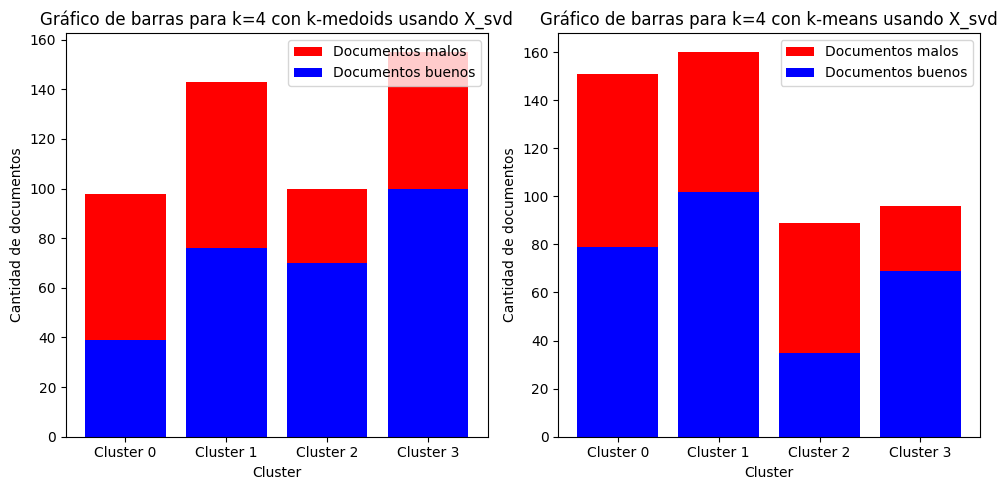

In [42]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn_extra.cluster import KMedoids
from sklearn.cluster import KMeans
from scipy.spatial.distance import cityblock
from numpy.linalg import norm
from scipy.spatial.distance import hamming
import textdistance
from scipy.spatial.distance import mahalanobis

# Definir una cadena de documentación para explicar el propósito y el funcionamiento del código
"""
Este código compara dos métodos de agrupamiento (k-medoids y k-means) para un conjunto de datos
de documentos reducidos por svd. Cada documento tiene una etiqueta binaria que indica si es bueno o malo según algún criterio.
El código usa k=kcluster como número de grupos. El código muestra un gráfico de barras para cada método con la cantidad de documentos
y la proporción de documentos buenos y malos por grupo.
"""

# Definir una función para hacer los gráficos de barras
def grafico_barras(datos, etiquetas, titulo, colores):
    # Crear un array con los nombres de los clusters
    clusters = np.array([f"Cluster {i}" for i in range(kcluster)])

    # Crear un array vacío para almacenar la cantidad de documentos por grupo
    counts = np.zeros(kcluster)

    # Crear un array vacío para almacenar la proporción de documentos buenos por grupo
    prop_buenos = np.zeros(kcluster)

    # Recorrer cada grupo y calcular las cantidades y proporciones deseadas
    for i in range(kcluster):
        # Filtrar los documentos que pertenecen al grupo i
        mask = etiquetas == i
        docs_grupo = datos[mask]
        calidad_grupo = calidad[mask]

        # Contar la cantidad de documentos en el grupo i
        counts[i] = len(docs_grupo)

        # Contar la cantidad de documentos buenos en el grupo i
        buenos_grupo = np.sum(calidad_grupo == 1)

        # Calcular la proporción de documentos buenos en el grupo i
        prop_buenos[i] = buenos_grupo / counts[i]

    # Ordenar los clusters y las cantidades según el orden de las cantidades
    order = np.arange(kcluster)
    clusters = clusters[order]
    counts = counts[order]
    prop_buenos = prop_buenos[order]

    # Hacer un gráfico de barras con los clusters y las cantidades
    plt.bar(clusters, counts, color=colores)

    # Hacer un gráfico de barras apilado con la proporción de documentos buenos por grupo
    plt.bar(clusters, counts * prop_buenos, color="blue")

    # Hacer un gráfico de barras apilado con la proporción de documentos malos por grupo
    plt.bar(clusters, counts * (1 - prop_buenos), color="red", bottom=counts * prop_buenos)

    # Añadir una leyenda para indicar el significado de los colores
    plt.legend(["Documentos malos", "Documentos buenos"])

    plt.xlabel("Cluster")
    plt.ylabel("Cantidad de documentos")
    plt.title(titulo)

# Definir el array de calidad de los documentos
calidad = binario

# Supongamos que X_svd es la matriz reducida por svd con el número óptimo de componentes
# Supongamos que calidad es el array de 267 elementos binarios que indican si cada documento es bueno o malo

# Hacer k-medoids con k=kcluster y distancia euclidiana
kmedoids = KMedoids(n_clusters=kcluster, metric='manhattan', random_state=0) # Crear el objeto kmedoids con k=kcluster y distancia euclidiana
kmedoids.fit(X_svd) # Ajustar el modelo a los datos
labels_kmedoids = kmedoids.labels_ # Obtener las etiquetas de los clusters

# Hacer k-means con k=kcluster y distancia euclidiana
kmeans = KMeans(n_clusters=kcluster, random_state=0)

# Calcular la matriz de distancia Manhattan manualmente
dist_matrix = np.zeros((X_svd.shape[0], X_svd.shape[0]))
for i in range(X_svd.shape[0]):
    for j in range(i+1, X_svd.shape[0]):
        dist = cityblock(X_svd[i], X_svd[j])
        dist_matrix[i, j] = dist
        dist_matrix[j, i] = dist

# Ajustar el modelo a los datos con la matriz de distancia
kmeans.fit(dist_matrix)

labels_kmeans = kmeans.labels_ # Obtener las etiquetas de los clusters

# Crear un array con los colores para cada grupo
colors = ["red", "blue", "green"]

# Crear una figura con una fila y dos columnas
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

# Ajustar el espacio entre los subplots
plt.subplots_adjust(wspace=0.3)

# Llamar a la función grafico_barras para cada algoritmo y subplot
plt.sca(axs[0]) # Establecer el subplot actual como el primero
grafico_barras(X_svd, labels_kmedoids, f"Gráfico de barras para k={kcluster} con k-medoids usando X_svd", colors)

plt.sca(axs[1]) # Establecer el subplot actual como el segundo
grafico_barras(X_svd, labels_kmeans, f"Gráfico de barras para k={kcluster} con k-means usando X_svd", colors)

# Ajustar los márgenes de los subplots
plt.tight_layout()

# Mostrar la figura
plt.show()




/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


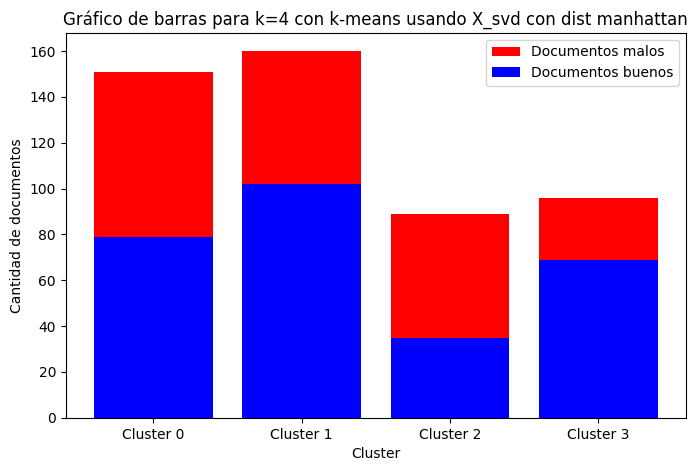

In [43]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Definir una función para hacer los gráficos de barras
def grafico_barras(datos, etiquetas, titulo, colores):
    # Crear un array con los nombres de los clusters
    clusters = np.array([f"Cluster {i}" for i in range(kcluster)])

    # Crear un array vacío para almacenar la cantidad de documentos por grupo
    counts = np.zeros(kcluster)

    # Crear un array vacío para almacenar la proporción de documentos buenos por grupo
    prop_buenos = np.zeros(kcluster)

    # Recorrer cada grupo y calcular las cantidades y proporciones deseadas
    for i in range(kcluster):
        # Filtrar los documentos que pertenecen al grupo i
        mask = etiquetas == i
        docs_grupo = datos[mask]
        calidad_grupo = calidad[mask]

        # Contar la cantidad de documentos en el grupo i
        counts[i] = len(docs_grupo)

        # Contar la cantidad de documentos buenos en el grupo i
        buenos_grupo = np.sum(calidad_grupo == 1)

        # Calcular la proporción de documentos buenos en el grupo i
        prop_buenos[i] = buenos_grupo / counts[i]

    # Ordenar los clusters y las cantidades según el orden de las cantidades
    order = np.arange(kcluster)
    clusters = clusters[order]
    counts = counts[order]
    prop_buenos = prop_buenos[order]

    # Hacer un gráfico de barras con los clusters y las cantidades
    plt.bar(clusters, counts, color=colores)

    # Hacer un gráfico de barras apilado con la proporción de documentos buenos por grupo
    plt.bar(clusters, counts * prop_buenos, color="blue")

    # Hacer un gráfico de barras apilado con la proporción de documentos malos por grupo
    plt.bar(clusters, counts * (1 - prop_buenos), color="red", bottom=counts * prop_buenos)

    # Añadir una leyenda para indicar el significado de los colores
    plt.legend(["Documentos malos", "Documentos buenos"])

    plt.xlabel("Cluster")
    plt.ylabel("Cantidad de documentos")
    plt.title(titulo)



# Hacer k-means con k=kcluster y distancia euclidiana
kmeans = KMeans(n_clusters=kcluster, random_state=0)
# Calcular la matriz de distancia Manhattan manualmente
dist_matrix = np.zeros((X_svd.shape[0], X_svd.shape[0]))
for i in range(X_svd.shape[0]):
    for j in range(i+1, X_svd.shape[0]):
        dist = cityblock(X_svd[i], X_svd[j])
        dist_matrix[i, j] = dist
        dist_matrix[j, i] = dist

# Ajustar el modelo a los datos con la matriz de distancia
kmeans.fit(dist_matrix)
labels_kmeans = kmeans.labels_ # Obtener las etiquetas de los clusters

# Crear un array con los colores para cada grupo
colors = ["red", "blue", "green"]

# Crear una figura para el gráfico de barras
plt.figure(figsize=(8, 5))

# Llamar a la función grafico_barras para el algoritmo K-means
grafico_barras(X_svd, labels_kmeans, f"Gráfico de barras para k={kcluster} con k-means usando X_svd con dist manhattan", colors)

# Mostrar el gráfico
plt.show()


## **3) hamming**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


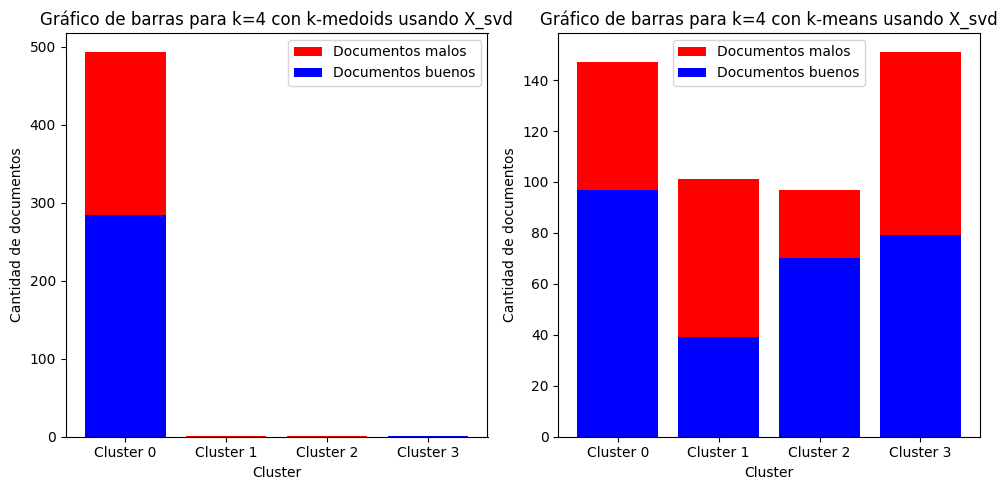

In [44]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn_extra.cluster import KMedoids
from sklearn.cluster import KMeans
from scipy.spatial.distance import cityblock
from numpy.linalg import norm
from scipy.spatial.distance import hamming
import textdistance
from scipy.spatial.distance import mahalanobis

# Definir una cadena de documentación para explicar el propósito y el funcionamiento del código
"""
Este código compara dos métodos de agrupamiento (k-medoids y k-means) para un conjunto de datos
de documentos reducidos por svd. Cada documento tiene una etiqueta binaria que indica si es bueno o malo según algún criterio.
El código usa k=kcluster como número de grupos. El código muestra un gráfico de barras para cada método con la cantidad de documentos
y la proporción de documentos buenos y malos por grupo.
"""

# Definir una función para hacer los gráficos de barras
def grafico_barras(datos, etiquetas, titulo, colores):
    # Crear un array con los nombres de los clusters
    clusters = np.array([f"Cluster {i}" for i in range(kcluster)])

    # Crear un array vacío para almacenar la cantidad de documentos por grupo
    counts = np.zeros(kcluster)

    # Crear un array vacío para almacenar la proporción de documentos buenos por grupo
    prop_buenos = np.zeros(kcluster)

    # Recorrer cada grupo y calcular las cantidades y proporciones deseadas
    for i in range(kcluster):
        # Filtrar los documentos que pertenecen al grupo i
        mask = etiquetas == i
        docs_grupo = datos[mask]
        calidad_grupo = calidad[mask]

        # Contar la cantidad de documentos en el grupo i
        counts[i] = len(docs_grupo)

        # Contar la cantidad de documentos buenos en el grupo i
        buenos_grupo = np.sum(calidad_grupo == 1)

        # Calcular la proporción de documentos buenos en el grupo i
        prop_buenos[i] = buenos_grupo / counts[i]

    # Ordenar los clusters y las cantidades según el orden de las cantidades
    order = np.arange(kcluster)
    clusters = clusters[order]
    counts = counts[order]
    prop_buenos = prop_buenos[order]

    # Hacer un gráfico de barras con los clusters y las cantidades
    plt.bar(clusters, counts, color=colores)

    # Hacer un gráfico de barras apilado con la proporción de documentos buenos por grupo
    plt.bar(clusters, counts * prop_buenos, color="blue")

    # Hacer un gráfico de barras apilado con la proporción de documentos malos por grupo
    plt.bar(clusters, counts * (1 - prop_buenos), color="red", bottom=counts * prop_buenos)

    # Añadir una leyenda para indicar el significado de los colores
    plt.legend(["Documentos malos", "Documentos buenos"])

    plt.xlabel("Cluster")
    plt.ylabel("Cantidad de documentos")
    plt.title(titulo)

# Definir el array de calidad de los documentos
calidad = binario

# Supongamos que X_svd es la matriz reducida por svd con el número óptimo de componentes
# Supongamos que calidad es el array de 267 elementos binarios que indican si cada documento es bueno o malo

# Hacer k-medoids con k=kcluster y distancia euclidiana
kmedoids = KMedoids(n_clusters=kcluster, metric='precomputed', random_state=0) # Crear el objeto kmedoids con k=kcluster y distancia euclidiana

# Calcular la matriz de distancia Hamming manualmente
dist_matrix_hamming_kmedoids = np.zeros((X_svd.shape[0], X_svd.shape[0]))
for i in range(X_svd.shape[0]):
    for j in range(i+1, X_svd.shape[0]):
        dist = hamming(X_svd[i], X_svd[j])
        dist_matrix_hamming_kmedoids[i, j] = dist
        dist_matrix_hamming_kmedoids[j, i] = dist

# Ajustar el modelo a los datos con la matriz de distancia Hamming
kmedoids.fit(dist_matrix_hamming_kmedoids)

labels_kmedoids = kmedoids.labels_ # Obtener las etiquetas de los clusters

# Hacer k-means con k=kcluster y distancia Hamming
kmeans = KMeans(n_clusters=kcluster, random_state=0)

# Calcular la matriz de distancia Hamming manualmente
dist_matrix_hamming_kmeans = np.zeros((X_svd.shape[0], X_svd.shape[0]))
for i in range(X_svd.shape[0]):
    for j in range(i+1, X_svd.shape[0]):
        dist = hamming(X_svd[i], X_svd[j])
        dist_matrix_hamming_kmeans[i, j] = dist
        dist_matrix_hamming_kmeans[j, i] = dist

# Ajustar el modelo a los datos con la matriz de distancia Hamming
kmeans.fit(dist_matrix_hamming_kmeans)

labels_kmeans = kmeans.labels_ # Obtener las etiquetas de los clusters

kmeans.fit(X_svd) # Ajustar el modelo a los datos
labels_kmeans = kmeans.labels_ # Obtener las etiquetas de los clusters

# Crear un array con los colores para cada grupo
colors = ["red", "blue", "green"]

# Crear una figura con una fila y dos columnas
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

# Ajustar el espacio entre los subplots
plt.subplots_adjust(wspace=0.3)

# Llamar a la función grafico_barras para cada algoritmo y subplot
plt.sca(axs[0]) # Establecer el subplot actual como el primero
grafico_barras(X_svd, labels_kmedoids, f"Gráfico de barras para k={kcluster} con k-medoids usando X_svd", colors)

plt.sca(axs[1]) # Establecer el subplot actual como el segundo
grafico_barras(X_svd, labels_kmeans, f"Gráfico de barras para k={kcluster} con k-means usando X_svd", colors)

# Ajustar los márgenes de los subplots
plt.tight_layout()

# Mostrar la figura
plt.show()


## **4 ) Chebyshev**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


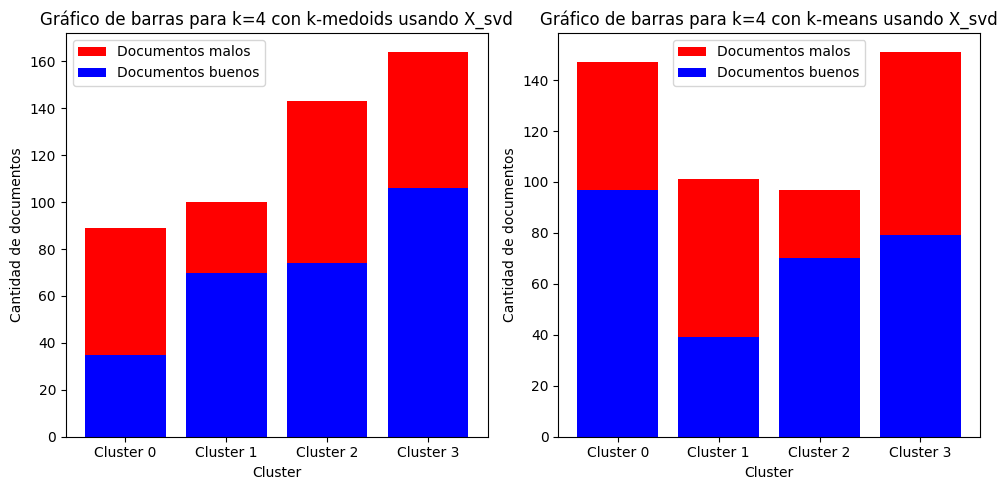

In [45]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn_extra.cluster import KMedoids
from sklearn.cluster import KMeans
from scipy.spatial.distance import cityblock
from numpy.linalg import norm
from scipy.spatial.distance import hamming
import textdistance
from scipy.spatial.distance import mahalanobis


# Definir una función para hacer los gráficos de barras
def grafico_barras(datos, etiquetas, titulo, colores):
    # Crear un array con los nombres de los clusters
    clusters = np.array([f"Cluster {i}" for i in range(kcluster)])
    
    # Crear un array vacío para almacenar la cantidad de documentos por grupo
    counts = np.zeros(kcluster)

    # Crear un array vacío para almacenar la proporción de documentos buenos por grupo
    prop_buenos = np.zeros(kcluster)

    # Recorrer cada grupo y calcular las cantidades y proporciones deseadas
    for i in range(kcluster):
        # Filtrar los documentos que pertenecen al grupo i
        mask = etiquetas == i
        docs_grupo = datos[mask]
        calidad_grupo = calidad[mask]

        # Contar la cantidad de documentos en el grupo i
        counts[i] = len(docs_grupo)

        # Contar la cantidad de documentos buenos en el grupo i
        buenos_grupo = np.sum(calidad_grupo == 1)

        # Calcular la proporción de documentos buenos en el grupo i
        prop_buenos[i] = buenos_grupo / counts[i]

    # Ordenar los clusters y las cantidades según el orden de las cantidades
    order = np.arange(kcluster)
    clusters = clusters[order]
    counts = counts[order]
    prop_buenos = prop_buenos[order]

    # Hacer un gráfico de barras con los clusters y las cantidades
    plt.bar(clusters, counts, color=colores)

    # Hacer un gráfico de barras apilado con la proporción de documentos buenos por grupo
    plt.bar(clusters, counts * prop_buenos, color="blue")

    # Hacer un gráfico de barras apilado con la proporción de documentos malos por grupo
    plt.bar(clusters, counts * (1 - prop_buenos), color="red", bottom=counts * prop_buenos)

    # Añadir una leyenda para indicar el significado de los colores
    plt.legend(["Documentos malos", "Documentos buenos"])

    plt.xlabel("Cluster")
    plt.ylabel("Cantidad de documentos")
    plt.title(titulo)

# Definir el array de calidad de los documentos
calidad = binario

# Supongamos que X_svd es la matriz reducida por svd con el número óptimo de componentes
# Supongamos que calidad es el array de 267 elementos binarios que indican si cada documento es bueno o malo

# Hacer k-medoids con k=kcluster y distancia euclidiana
kmedoids = KMedoids(n_clusters=kcluster, metric='precomputed', random_state=0) # Crear el objeto kmedoids con k=kcluster y distancia euclidiana

# Calcular la matriz de distancia Hamming manualmente
dist_matrix_chebyshev_kmedoids = np.zeros((X_svd.shape[0], X_svd.shape[0]))

for i in range(X_svd.shape[0]):
    for j in range(i+1, X_svd.shape[0]):
        dist = np.abs(X_svd[i] - X_svd[j]).max()
        dist_matrix_chebyshev_kmedoids[i, j] = dist
        dist_matrix_chebyshev_kmedoids[j, i] = dist

# Ajustar el modelo a los datos con la matriz de distancia Hamming
kmedoids.fit(dist_matrix_chebyshev_kmedoids)

labels_kmedoids = kmedoids.labels_ # Obtener las etiquetas de los clusters

# Hacer k-means con k=kcluster y distancia Hamming
kmeans = KMeans(n_clusters=kcluster, random_state=0)

# Calcular la matriz de distancia Hamming manualmente
dist_matrix_chebyshev_kmeans = np.zeros((X_svd.shape[0], X_svd.shape[0]))

for i in range(X_svd.shape[0]):
    for j in range(i+1, X_svd.shape[0]):
        dist = np.abs(X_svd[i] - X_svd[j]).max()
        dist_matrix_chebyshev_kmeans[i, j] = dist
        dist_matrix_chebyshev_kmeans[j, i] = dist

# Ajustar el modelo a los datos con la matriz de distancia Hamming
kmeans.fit(dist_matrix_chebyshev_kmeans)

labels_kmeans = kmeans.labels_ # Obtener las etiquetas de los clusters

kmeans.fit(X_svd) # Ajustar el modelo a los datos
labels_kmeans = kmeans.labels_ # Obtener las etiquetas de los clusters

# Crear un array con los colores para cada grupo
colors = ["red", "blue", "green"]

# Crear una figura con una fila y dos columnas
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

# Ajustar el espacio entre los subplots
plt.subplots_adjust(wspace=0.3)

# Llamar a la función grafico_barras para cada algoritmo y subplot
plt.sca(axs[0]) # Establecer el subplot actual como el primero
grafico_barras(X_svd, labels_kmedoids, f"Gráfico de barras para k={kcluster} con k-medoids usando X_svd", colors)

plt.sca(axs[1]) # Establecer el subplot actual como el segundo
grafico_barras(X_svd, labels_kmeans, f"Gráfico de barras para k={kcluster} con k-means usando X_svd", colors)

# Ajustar los márgenes de los subplots
plt.tight_layout()

# Mostrar la figura
plt.show()

## **5) distancia de cosenos**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


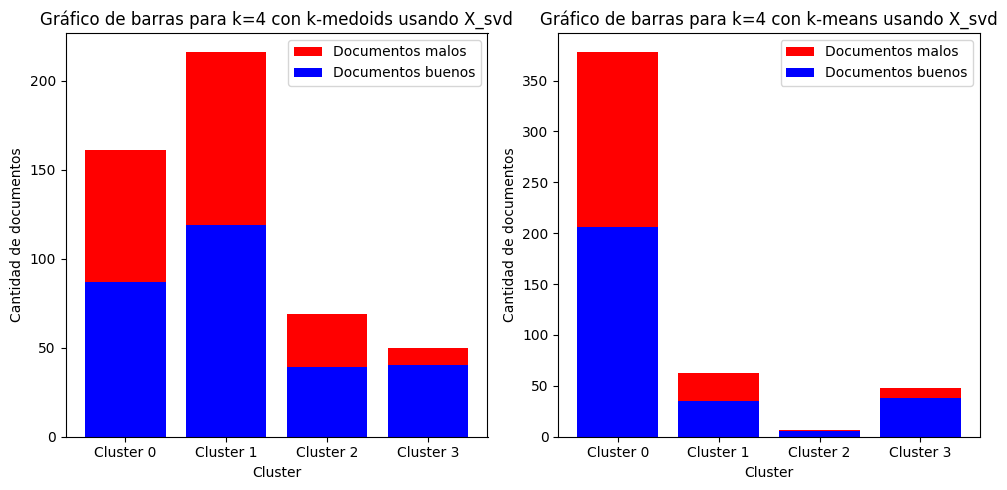

In [46]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn_extra.cluster import KMedoids
from sklearn.cluster import KMeans
from numpy.linalg import inv

###distancias para kmeans 
##  norm            -     euclidian
##  cityblock       -     manhattan
##  hamming         -     hamming
##  levenshtein     -    levenshtein
##  mahalanobis     -    mahalanobis

# Calcular la inversa de la matriz de covarianza de los datos
VI = inv(np.cov(X_svd.T))

###distancias para kmedoidis 
##  euclidian       -     euclidian
##  manhattan       -     manhattan
##  hamming         -     precomputed
##  levenshtein     -    levenshtein
##  mahalanobis     -    mahalanobis

from scipy.spatial.distance import cityblock
from numpy.linalg import norm
from scipy.spatial.distance import hamming
import textdistance
from scipy.spatial.distance import mahalanobis
from sklearn.metrics import pairwise_distances


# Definir una cadena de documentación para explicar el propósito y el funcionamiento del código
"""
Este código compara dos métodos de agrupamiento (k-medoids y k-means) para un conjunto de datos
de documentos reducidos por svd. Cada documento tiene una etiqueta binaria que indica si es bueno o malo según algún criterio.
El código usa k=kcluster como número de grupos. El código muestra un gráfico de barras para cada método con la cantidad de documentos
y la proporción de documentos buenos y malos por grupo.
"""

# Definir una función para hacer los gráficos de barras
def grafico_barras(datos, etiquetas, titulo, colores):
    # Crear un array con los nombres de los clusters
    clusters = np.array([f"Cluster {i}" for i in range(kcluster)])

    # Crear un array vacío para almacenar la cantidad de documentos por grupo
    counts = np.zeros(kcluster)

    # Crear un array vacío para almacenar la proporción de documentos buenos por grupo
    prop_buenos = np.zeros(kcluster)

    # Recorrer cada grupo y calcular las cantidades y proporciones deseadas
    for i in range(kcluster):
        # Filtrar los documentos que pertenecen al grupo i
        mask = etiquetas == i
        docs_grupo = datos[mask]
        calidad_grupo = calidad[mask]

        # Contar la cantidad de documentos en el grupo i
        counts[i] = len(docs_grupo)

        # Contar la cantidad de documentos buenos en el grupo i
        buenos_grupo = np.sum(calidad_grupo == 1)

        # Calcular la proporción de documentos buenos en el grupo i
        prop_buenos[i] = buenos_grupo / counts[i]

    # Ordenar los clusters y las cantidades según el orden de las cantidades
    order = np.arange(kcluster)
    clusters = clusters[order]
    counts = counts[order]
    prop_buenos = prop_buenos[order]

    # Hacer un gráfico de barras con los clusters y las cantidades
    plt.bar(clusters, counts, color=colores)

    # Hacer un gráfico de barras apilado con la proporción de documentos buenos por grupo
    plt.bar(clusters, counts * prop_buenos, color="blue")

    # Hacer un gráfico de barras apilado con la proporción de documentos malos por grupo
    plt.bar(clusters, counts * (1 - prop_buenos), color="red", bottom=counts * prop_buenos)

    # Añadir una leyenda para indicar el significado de los colores
    plt.legend(["Documentos malos", "Documentos buenos"])

    plt.xlabel("Cluster")
    plt.ylabel("Cantidad de documentos")
    plt.title(titulo)

# Definir el array de calidad de los documentos
calidad = binario

# Supongamos que X_svd es la matriz reducida por svd con el número óptimo de componentes
# Supongamos que calidad es el array de 267 elementos binarios que indican si cada documento es bueno o malo

# Hacer k-medoids con k=kcluster y distancia Mahalanobis
kmedoids = KMedoids(n_clusters=kcluster, metric='precomputed', random_state=0)

# Calcular la matriz de distancia de similitud de cosenos manualmente
dist_matrix_cosine_kmedoids = pairwise_distances(X_svd, metric='cosine')

# Ajustar el modelo a los datos con la matriz de distancia de similitud de cosenos
kmedoids.fit(dist_matrix_cosine_kmedoids)

labels_kmedoids = kmedoids.labels_ # Obtener las etiquetas de los clusters

# Hacer k-means con k=kcluster y distancia Hamming
kmeans = KMeans(n_clusters=kcluster, random_state=0)

# Calcular la matriz de distancia de similitud de cosenos manualmente
dist_matrix_cosine_kmeans = pairwise_distances(X_svd, metric='cosine')

# Ajustar el modelo a los datos con la matriz de distancia de similitud de cosenos
kmeans.fit(dist_matrix_cosine_kmeans)

labels_kmeans = kmeans.labels_ # Obtener las etiquetas de los clusters

# Crear un array con los colores para cada grupo
colors = ["red", "blue", "green"]

# Crear una figura con una fila y dos columnas
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

# Ajustar el espacio entre los subplots
plt.subplots_adjust(wspace=0.3)

# Llamar a la función grafico_barras para cada algoritmo y subplot
plt.sca(axs[0]) # Establecer el subplot actual como el primero
grafico_barras(X_svd, labels_kmedoids, f"Gráfico de barras para k={kcluster} con k-medoids usando X_svd", colors)

plt.sca(axs[1]) # Establecer el subplot actual como el segundo
grafico_barras(X_svd, labels_kmeans, f"Gráfico de barras para k={kcluster} con k-means usando X_svd", colors)

# Ajustar los márgenes de los subplots
plt.tight_layout()

# Mostrar la figura
plt.show()


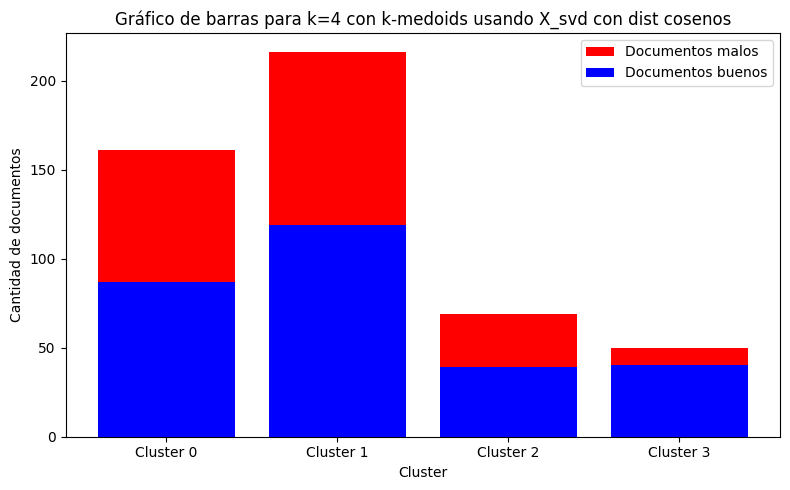

In [47]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn_extra.cluster import KMedoids
from sklearn.cluster import KMeans
from numpy.linalg import inv
from scipy.spatial.distance import cityblock
from numpy.linalg import norm
from scipy.spatial.distance import hamming
import textdistance
from scipy.spatial.distance import mahalanobis
from sklearn.metrics import pairwise_distances

# Calcular la inversa de la matriz de covarianza de los datos
VI = inv(np.cov(X_svd.T))

# Definir una cadena de documentación para explicar el propósito y el funcionamiento del código
"""
Este código compara dos métodos de agrupamiento (k-medoids y k-means) para un conjunto de datos
de documentos reducidos por svd. Cada documento tiene una etiqueta binaria que indica si es bueno o malo según algún criterio.
El código usa k=kcluster como número de grupos. El código muestra un gráfico de barras para cada método con la cantidad de documentos
y la proporción de documentos buenos y malos por grupo.
"""

# Definir una función para hacer los gráficos de barras
def grafico_barras(datos, etiquetas, titulo, colores):
    # Crear un array con los nombres de los clusters
    clusters = np.array([f"Cluster {i}" for i in range(kcluster)])

    # Crear un array vacío para almacenar la cantidad de documentos por grupo
    counts = np.zeros(kcluster)

    # Crear un array vacío para almacenar la proporción de documentos buenos por grupo
    prop_buenos = np.zeros(kcluster)

    # Recorrer cada grupo y calcular las cantidades y proporciones deseadas
    for i in range(kcluster):
        # Filtrar los documentos que pertenecen al grupo i
        mask = etiquetas == i
        docs_grupo = datos[mask]
        calidad_grupo = calidad[mask]

        # Contar la cantidad de documentos en el grupo i
        counts[i] = len(docs_grupo)

        # Contar la cantidad de documentos buenos en el grupo i
        buenos_grupo = np.sum(calidad_grupo == 1)

        # Calcular la proporción de documentos buenos en el grupo i
        prop_buenos[i] = buenos_grupo / counts[i]

    # Ordenar los clusters y las cantidades según el orden de las cantidades
    order = np.arange(kcluster)
    clusters = clusters[order]
    counts = counts[order]
    prop_buenos = prop_buenos[order]

    # Hacer un gráfico de barras con los clusters y las cantidades
    plt.bar(clusters, counts, color=colores)

    # Hacer un gráfico de barras apilado con la proporción de documentos buenos por grupo
    plt.bar(clusters, counts * prop_buenos, color="blue")

    # Hacer un gráfico de barras apilado con la proporción de documentos malos por grupo
    plt.bar(clusters, counts * (1 - prop_buenos), color="red", bottom=counts * prop_buenos)

    # Añadir una leyenda para indicar el significado de los colores
    plt.legend(["Documentos malos", "Documentos buenos"])

    plt.xlabel("Cluster")
    plt.ylabel("Cantidad de documentos")
    plt.title(titulo)

# Definir el array de calidad de los documentos
calidad = binario

# Supongamos que X_svd es la matriz reducida por svd con el número óptimo de componentes
# Supongamos que calidad es el array de 267 elementos binarios que indican si cada documento es bueno o malo

# Hacer k-medoids con k=kcluster y distancia Mahalanobis
kmedoids = KMedoids(n_clusters=kcluster, metric='precomputed', random_state=0)

# Calcular la matriz de distancia de similitud de cosenos manualmente
dist_matrix_cosine_kmedoids = pairwise_distances(X_svd, metric='cosine')

# Ajustar el modelo a los datos con la matriz de distancia de similitud de cosenos
kmedoids.fit(dist_matrix_cosine_kmedoids)

labels_kmedoids = kmedoids.labels_ # Obtener las etiquetas de los clusters

# Crear un array con los colores para cada grupo
colors = ["red", "blue", "green"]

# Crear una figura con una fila y una columna
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(8, 5))

# Llamar a la función grafico_barras para cada algoritmo y subplot
grafico_barras(X_svd, labels_kmedoids, f"Gráfico de barras para k={kcluster} con k-medoids usando X_svd con dist cosenos", colors)

# Ajustar los márgenes de los subplots
plt.tight_layout()

# Mostrar la figura
plt.show()


## **6) Jaccard**

/usr/local/lib/python3.10/dist-packages/sklearn_extra/cluster/_k_medoids.py:329: UserWarning: Cluster 1 is empty! self.labels_[self.medoid_indices_[1]] may not be labeled with its corresponding cluster (1).
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn_extra/cluster/_k_medoids.py:329: UserWarning: Cluster 2 is empty! self.labels_[self.medoid_indices_[2]] may not be labeled with its corresponding cluster (2).
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn_extra/cluster/_k_medoids.py:329: UserWarning: Cluster 3 is empty! self.labels_[self.medoid_indices_[3]] may not be labeled with its corresponding cluster (3).
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-48-f0511c47a568>:101: ConvergenceWarning: Number of distinct clusters (1) found 

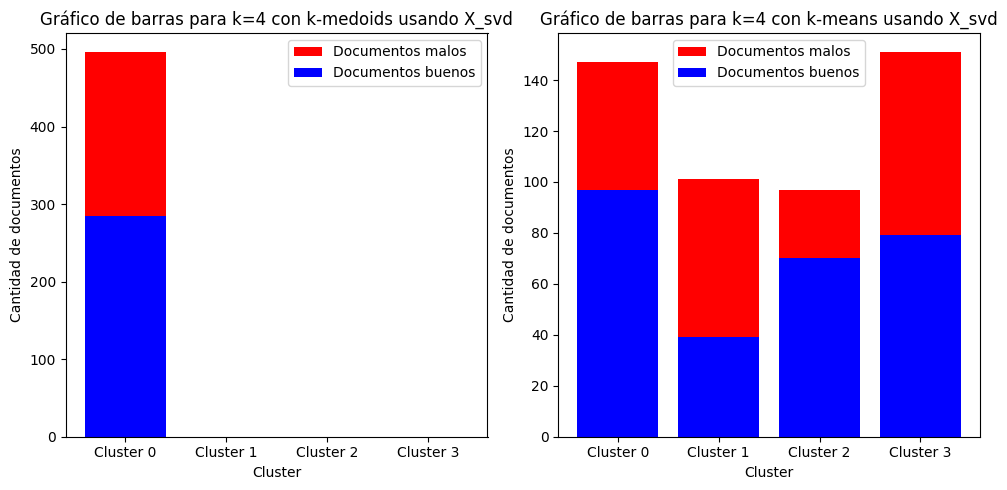

In [48]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn_extra.cluster import KMedoids
from sklearn.cluster import KMeans
from scipy.spatial.distance import cityblock
from numpy.linalg import norm
from scipy.spatial.distance import hamming
import textdistance
from scipy.spatial.distance import mahalanobis
from scipy.spatial.distance import canberra
from scipy.spatial.distance import jaccard


# Definir una función para hacer los gráficos de barras
def grafico_barras(datos, etiquetas, titulo, colores):
    # Crear un array con los nombres de los clusters
    clusters = np.array([f"Cluster {i}" for i in range(kcluster)])
    
    # Crear un array vacío para almacenar la cantidad de documentos por grupo
    counts = np.zeros(kcluster)

    # Crear un array vacío para almacenar la proporción de documentos buenos por grupo
    prop_buenos = np.zeros(kcluster)

    # Recorrer cada grupo y calcular las cantidades y proporciones deseadas
    for i in range(kcluster):
        # Filtrar los documentos que pertenecen al grupo i
        mask = etiquetas == i
        docs_grupo = datos[mask]
        calidad_grupo = calidad[mask]

        # Contar la cantidad de documentos en el grupo i
        counts[i] = len(docs_grupo)

        # Contar la cantidad de documentos buenos en el grupo i
        buenos_grupo = np.sum(calidad_grupo == 1)

        # Calcular la proporción de documentos buenos en el grupo i
        prop_buenos[i] = buenos_grupo / counts[i]

    # Ordenar los clusters y las cantidades según el orden de las cantidades
    order = np.arange(kcluster)
    clusters = clusters[order]
    counts = counts[order]
    prop_buenos = prop_buenos[order]

    # Hacer un gráfico de barras con los clusters y las cantidades
    plt.bar(clusters, counts, color=colores)

    # Hacer un gráfico de barras apilado con la proporción de documentos buenos por grupo
    plt.bar(clusters, counts * prop_buenos, color="blue")

    # Hacer un gráfico de barras apilado con la proporción de documentos malos por grupo
    plt.bar(clusters, counts * (1 - prop_buenos), color="red", bottom=counts * prop_buenos)

    # Añadir una leyenda para indicar el significado de los colores
    plt.legend(["Documentos malos", "Documentos buenos"])

    plt.xlabel("Cluster")
    plt.ylabel("Cantidad de documentos")
    plt.title(titulo)

# Definir el array de calidad de los documentos
calidad = binario

# Supongamos que X_svd es la matriz reducida por svd con el número óptimo de componentes
# Supongamos que calidad es el array de 267 elementos binarios que indican si cada documento es bueno o malo

# Hacer k-medoids con k=kcluster y distancia euclidiana
kmedoids = KMedoids(n_clusters=kcluster, metric='precomputed', random_state=0) # Crear el objeto kmedoids con k=kcluster y distancia euclidiana

# Calcular la matriz de distancia Jaccard manualmente
dist_matrix_jaccard_kmedoids = np.zeros((X_svd.shape[0], X_svd.shape[0]))

for i in range(X_svd.shape[0]):
    for j in range(i+1, X_svd.shape[0]):
        dist = 1.0 - jaccard(X_svd[i], X_svd[j])
        dist_matrix_jaccard_kmedoids[i, j] = dist
        dist_matrix_jaccard_kmedoids[j, i] = dist

# Ajustar el modelo a los datos con la matriz de distancia Jaccard
kmedoids.fit(dist_matrix_jaccard_kmedoids)

labels_kmedoids = kmedoids.labels_ # Obtener las etiquetas de los clusters


# Hacer k-means con k=kcluster y distancia Hamming
kmeans = KMeans(n_clusters=kcluster, random_state=0)


# Calcular la matriz de distancia de Jaccard manualmente
dist_matrix_jaccard_kmeans = np.zeros((X_svd.shape[0], X_svd.shape[0]))

for i in range(X_svd.shape[0]):
    for j in range(i+1, X_svd.shape[0]):
        dist = 1.0 - jaccard(X_svd[i], X_svd[j])
        dist_matrix_jaccard_kmeans[i, j] = dist
        dist_matrix_jaccard_kmeans[j, i] = dist

# Ajustar el modelo a los datos con la matriz de distancia de Jaccard
kmeans.fit(dist_matrix_jaccard_kmeans)

labels_kmeans = kmeans.labels_ # Obtener las etiquetas de los clusters



kmeans.fit(X_svd) # Ajustar el modelo a los datos
labels_kmeans = kmeans.labels_ # Obtener las etiquetas de los clusters

# Crear un array con los colores para cada grupo
colors = ["red", "blue", "green"]

# Crear una figura con una fila y dos columnas
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

# Ajustar el espacio entre los subplots
plt.subplots_adjust(wspace=0.3)

# Llamar a la función grafico_barras para cada algoritmo y subplot
plt.sca(axs[0]) # Establecer el subplot actual como el primero
grafico_barras(X_svd, labels_kmedoids, f"Gráfico de barras para k={kcluster} con k-medoids usando X_svd", colors)

plt.sca(axs[1]) # Establecer el subplot actual como el segundo
grafico_barras(X_svd, labels_kmeans, f"Gráfico de barras para k={kcluster} con k-means usando X_svd", colors)

# Ajustar los márgenes de los subplots
plt.tight_layout()

# Mostrar la figura
plt.show()

## **7) Canberra**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


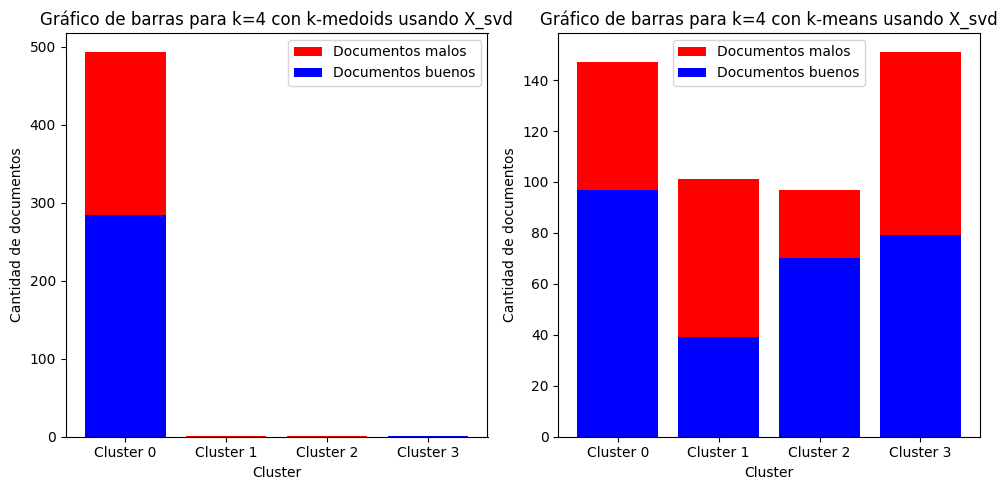

In [49]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn_extra.cluster import KMedoids
from sklearn.cluster import KMeans
from scipy.spatial.distance import cityblock
from numpy.linalg import norm
from scipy.spatial.distance import hamming
import textdistance
from scipy.spatial.distance import mahalanobis
from scipy.spatial.distance import canberra

# Definir una función para hacer los gráficos de barras
def grafico_barras(datos, etiquetas, titulo, colores):
    # Crear un array con los nombres de los clusters
    clusters = np.array([f"Cluster {i}" for i in range(kcluster)])
    
    # Crear un array vacío para almacenar la cantidad de documentos por grupo
    counts = np.zeros(kcluster)

    # Crear un array vacío para almacenar la proporción de documentos buenos por grupo
    prop_buenos = np.zeros(kcluster)

    # Recorrer cada grupo y calcular las cantidades y proporciones deseadas
    for i in range(kcluster):
        # Filtrar los documentos que pertenecen al grupo i
        mask = etiquetas == i
        docs_grupo = datos[mask]
        calidad_grupo = calidad[mask]

        # Contar la cantidad de documentos en el grupo i
        counts[i] = len(docs_grupo)

        # Contar la cantidad de documentos buenos en el grupo i
        buenos_grupo = np.sum(calidad_grupo == 1)

        # Calcular la proporción de documentos buenos en el grupo i
        prop_buenos[i] = buenos_grupo / counts[i]

    # Ordenar los clusters y las cantidades según el orden de las cantidades
    order = np.arange(kcluster)
    clusters = clusters[order]
    counts = counts[order]
    prop_buenos = prop_buenos[order]

    # Hacer un gráfico de barras con los clusters y las cantidades
    plt.bar(clusters, counts, color=colores)

    # Hacer un gráfico de barras apilado con la proporción de documentos buenos por grupo
    plt.bar(clusters, counts * prop_buenos, color="blue")

    # Hacer un gráfico de barras apilado con la proporción de documentos malos por grupo
    plt.bar(clusters, counts * (1 - prop_buenos), color="red", bottom=counts * prop_buenos)

    # Añadir una leyenda para indicar el significado de los colores
    plt.legend(["Documentos malos", "Documentos buenos"])

    plt.xlabel("Cluster")
    plt.ylabel("Cantidad de documentos")
    plt.title(titulo)

# Definir el array de calidad de los documentos
calidad = binario

# Supongamos que X_svd es la matriz reducida por svd con el número óptimo de componentes
# Supongamos que calidad es el array de 267 elementos binarios que indican si cada documento es bueno o malo

# Hacer k-medoids con k=kcluster y distancia euclidiana
kmedoids = KMedoids(n_clusters=kcluster, metric='precomputed', random_state=0) # Crear el objeto kmedoids con k=kcluster y distancia euclidiana

# Calcular la matriz de distancia Hamming manualmente
dist_matrix_hamming_kmedoids = np.zeros((X_svd.shape[0], X_svd.shape[0]))

for i in range(X_svd.shape[0]):
    for j in range(i+1, X_svd.shape[0]):
        dist = hamming(X_svd[i], X_svd[j])
        dist_matrix_hamming_kmedoids[i, j] = dist
        dist_matrix_hamming_kmedoids[j, i] = dist

# Ajustar el modelo a los datos con la matriz de distancia Hamming
kmedoids.fit(dist_matrix_hamming_kmedoids)

labels_kmedoids = kmedoids.labels_ # Obtener las etiquetas de los clusters


# Hacer k-means con k=kcluster y distancia Hamming
kmeans = KMeans(n_clusters=kcluster, random_state=0)


# Calcular la matriz de distancia de Canberra manualmente
dist_matrix_canberra_kmeans = np.zeros((X_svd.shape[0], X_svd.shape[0]))

for i in range(X_svd.shape[0]):
    for j in range(i+1, X_svd.shape[0]):
        dist = canberra(X_svd[i], X_svd[j])
        dist_matrix_canberra_kmeans[i, j] = dist
        dist_matrix_canberra_kmeans[j, i] = dist

# Ajustar el modelo a los datos con la matriz de distancia de Canberra
kmeans.fit(dist_matrix_canberra_kmeans)

labels_kmeans = kmeans.labels_ # Obtener las etiquetas de los clusters



kmeans.fit(X_svd) # Ajustar el modelo a los datos
labels_kmeans = kmeans.labels_ # Obtener las etiquetas de los clusters

# Crear un array con los colores para cada grupo
colors = ["red", "blue", "green"]

# Crear una figura con una fila y dos columnas
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

# Ajustar el espacio entre los subplots
plt.subplots_adjust(wspace=0.3)

# Llamar a la función grafico_barras para cada algoritmo y subplot
plt.sca(axs[0]) # Establecer el subplot actual como el primero
grafico_barras(X_svd, labels_kmedoids, f"Gráfico de barras para k={kcluster} con k-medoids usando X_svd", colors)

plt.sca(axs[1]) # Establecer el subplot actual como el segundo
grafico_barras(X_svd, labels_kmeans, f"Gráfico de barras para k={kcluster} con k-means usando X_svd", colors)

# Ajustar los márgenes de los subplots
plt.tight_layout()

# Mostrar la figura
plt.show()